# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Louis Widi
- Email: louizzzwidi@gmail.com
- Id Dicoding: louis_widi

## Business Understanding
Jaya Jaya Institut merupakan salah satu institusi pendidikan perguruan yang telah berdiri sejak tahun 2000. Hingga saat ini ia telah mencetak banyak lulusan dengan reputasi yang sangat baik.

## Permasalahan Bisnis
1. **Jumlah dropout yang tinggi:** Jaya Jaya Institut ingin menjadi sebuah institusi pendidikan yang berkualitas dan dibuktikan dengan minimnya angka dropout.
2. **Metode deteksi dini:** Jaya Jaya Institut ingin memiliki sistem penanganan dropout, dibantu oleh sebuah metode deteksi dini yang baik, menggunakan pendekatan *machine learning*.
3. **Sarana pemaparan data:** Jaya Jaya Institut ingin memiliki sebuah dashboard yang dapat memberikan paparan terhadap data-data dinamika pendidikan yang terjadi, demi membantu pengambilan keputusan.

## Cakupan Proyek
1. **Identifikasi** faktor penyebab dropout dan membandingkannya dengan faktor-faktor yang mempengaruhi kelulusan. Hal ini akan membantu pihak institusi untuk memberikan program-program dan pendekatan pendidikan yang lebih baik.
2. **Pra-Premrosesan Data** yang akan digunakan dalam proses prediksi. Diharapkan, data-data yang digunakan merupakan data yang paling merepresentasikan informasi. Langkah-langkah pra-pemrosesan akan mencakup standardisasi dan encoding fitur kategorik, serta memilih fitur yang representatif.
3. **Modeling** untuk memberikan sebuah sarana yang dapat memprediksi apakah seseorang akan dropout, lulus, atau sedang belajar berdasarkan beberapa input fitur.
4. **Evaluasi Modeling** untuk mengetahui pendekatan model *machine learning* yang terbaik.
5. **Deployment** model *machine learning* untuk memberikan sarana interaktif bagi Jaya Jaya Institut dalam memprediksi *outcome* seorang pelajar.
6. **Dashboard** untuk memberikan paparan interaktif bagi Jaya Jaya Maju dalam memahami data terkait pendidikan.



## 1. Persiapan
### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import resample, shuffle
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report, ConfusionMatrixDisplay

import joblib

### Mempersiapkan Data yang akan Digunakan

In [2]:
df = pd.read_csv('data.csv', sep=';')
df

Marital_status  Application_mode  Application_order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime_evening_attendance  Previous_qualification  \
0                              1                       1   
1                              1                       1   
2                              1                       1   
3                              1                       1   
4                              0                       1   
...                          ...                     ...   
4419                           1                       1   
4420                           1                       1   
4421                           1                       1   
4422                           1                       1   
4423                           1                       1   

      Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                            122.0            1                     19   
1                            160.0            1                      1   
2                            122.0            1                     37   
3                            122.0            1                     38   
4                            100.0            1                     37   
...                            ...          ...                    ...   
4419                         125.0            1                      1   
4420                         120.0          105                      1   
4421                         154.0            1                     37   
4422                         180.0            1                     37   
4423                         152.0           22                     38   

      Fathers_qualification  ...  Curricular_units_2nd_sem_credited  \
0                        12  ...                                  0   
1                         3  ...                                  0   
2                        37  ...                                  0   
3                        37  ...                                  0   
4                        38  ...                                  0   
...                     ...  ...                                ...   
4419                      1  ...                                  0   
4420                      1  ...                                  0   
4421                     37  ...                                  0   
4422                     37  ...                                  0   
4423                     37  ...                                  0   

      Curricular_units_2nd_sem_enrolled  Curricular_units_2nd_sem_evaluations  \
0                                     0                                     0   
1                                     6                                     6   
2                                     6                                     0   
3                                     6                                    10   
4                                     6                                     6   
...                                 ...                                   ...   
4419                                  6                                     8   
4420                                  6                           

## 2. Data Understanding
### Memahami Fitur-Fitur pada Dataset

| Column name | Description |
| --- | --- |
|Marital status | The marital status of the student. (Categorical) 1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated |
| Application mode | The method of application used by the student. (Categorical) 1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)|
|Application order | The order in which the student applied. (Numerical) Application order (between 0 - first choice; and 9 last choice) |
|Course | The course taken by the student. (Categorical) 33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)|
|Daytime/evening attendance | Whether the student attends classes during the day or in the evening. (Categorical) 1 – daytime 0 - evening |
|Previous qualification| The qualification obtained by the student before enrolling in higher education. (Categorical) 1 - Secondary education 2 - Higher education - bachelor's degree 3 - Higher education - degree 4 - Higher education - master's 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle) |
|Previous qualification (grade) | Grade of previous qualification (between 0 and 200) |
| Nacionality | The nationality of the student. (Categorical) 1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian|
|Mother's qualification | The qualification of the student's mother. (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)|
|Father's qualification | The qualification of the student's father. (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 13 - 2nd year complementary high school course 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 20 - Complementary High School Course 22 - Technical-professional course 25 - Complementary High School Course - not concluded 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 31 - General Course of Administration and Commerce 33 - Supplementary Accounting and Administration 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle) |
| Mother's occupation | The occupation of the student's mother. (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants |
| Father's occupation | The occupation of the student's father. (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 101 - Armed Forces Officers 102 - Armed Forces Sergeants 103 - Other Armed Forces personnel 112 - Directors of administrative and commercial services 114 - Hotel, catering, trade and other services directors 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 122 - Health professionals 123 - teachers 124 - Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 135 - Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 154 - Protection and security services personnel 161 - Market-oriented farmers and skilled agricultural and animal production workers 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 171 - Skilled construction workers and the like, except electricians 172 - Skilled workers in metallurgy, metalworking and similar 174 - Skilled workers in electricity and electronics 175 - Workers in food processing, woodworking, clothing and other industries and crafts 181 - Fixed plant and machine operators 182 - assembly workers 183 - Vehicle drivers and mobile equipment operators 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants 195 - Street vendors (except food) and street service providers |
| Admission grade | Admission grade (between 0 and 200) |
| Displaced | Whether the student is a displaced person. (Categorical) 	1 – yes 0 – no |
| Educational special needs | Whether the student has any special educational needs. (Categorical) 1 – yes 0 – no |
|Debtor | Whether the student is a debtor. (Categorical) 1 – yes 0 – no|
|Tuition fees up to date | Whether the student's tuition fees are up to date. (Categorical) 1 – yes 0 – no|
|Gender | The gender of the student. (Categorical) 1 – male 0 – female |
|Scholarship holder | Whether the student is a scholarship holder. (Categorical) 1 – yes 0 – no |
|Age at enrollment | The age of the student at the time of enrollment. (Numerical)|
|International | Whether the student is an international student. (Categorical) 1 – yes 0 – no|
|Curricular units 1st sem (credited) | The number of curricular units credited by the student in the first semester. (Numerical) |
| Curricular units 1st sem (enrolled) | The number of curricular units enrolled by the student in the first semester. (Numerical) |
| Curricular units 1st sem (evaluations) | The number of curricular units evaluated by the student in the first semester. (Numerical) |
| Curricular units 1st sem (approved) | The number of curricular units approved by the student in the first semester. (Numerical) |

#### Acknowledgements
Realinho,Valentim, Vieira Martins,Mónica, Machado,Jorge, and Baptista,Luís. (2021). Predict students' dropout and academic success. UCI Machine Learning Repository. https://doi.org/10.24432/C5MC89. 

### Memahami Jumlah Data, Fitur, dan Nilai Hilang

In [3]:
print({df.info()})
print(f"\n\n\nJumlah Missing Values pada Masing-Masing Kolom\n\n\n{df.isnull().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Dari penemuan ini, tidak ada nilai yang hilang, dan semua fitur memiliki 4424 nilai.

### Mengubah Nilai Angka Dataset menjadi Kategorik
Perubahan dilakukan berdasarkan penjelasan terkait fitur yang sudah diberikan sebelumnya.

In [4]:
dict_Marital_status = {1: 'Single', 
                       2: 'Married', 
                       3: 'Widower', 
                       4: 'Divorced', 
                       5: 'Facto Union', 
                       6: 'Legally Separated'}
dict_Application_mode = {1: '1st phase - general contingent', 
                         2: 'Ordinance No. 612/93' , 
                         5: '1st phase - special contingent (Azores Island)', 
                         7: 'Holders of other higher courses', 
                         10: 'Ordinance No. 854-B/99', 
                         15: 'International student (bachelor)', 
                         16: '1st phase - special contingent (Madeira Island)', 
                         17: '2nd phase - general contingent', 
                         18: '3rd phase - general contingent', 
                         26: 'Ordinance No. 533-A/99, item b2) (Different Plan)', 
                         27: 'Ordinance No. 533-A/99, item b3 (Other Institution)', 
                         39: 'Over 23 years old', 
                         42: 'Transfer', 
                         43: 'Change of course', 
                         44: 'Technological specialization diploma holders', 
                         51: 'Change of institution/course', 
                         53: 'Short cycle diploma holders', 
                         57: 'Change of institution/course (International)'}

dict_Course = {33: 'Biofuel Production Technologies', 
             171: 'Animation and Multimedia Design', 
             8014: 'Social Service (evening attendance)', 
             9003: 'Agronomy', 
             9070: 'Communication Design', 
             9085: 'Veterinary Nursing', 
             9119: 'Informatics Engineering', 
             9130: 'Equinculture', 
             9147: 'Management', 
             9238: 'Social Service', 
             9254: 'Tourism', 
             9500: 'Nursing', 
             9556: 'Oral Hygiene', 
             9670: 'Advertising and Marketing Management', 
             9773: 'Journalism and Communication', 
             9853: 'Basic Education', 
             9991: 'Management (evening attendance)'}

dict_Daytime_evening_attendance = {0: 'Evening',
                                  1: 'Daytime'}
dict_Previous_qualification = {1: 'Secondary education', 
                               2: 'Higher education - bachelor\'s degree', 
                               3: 'Higher education - degree', 
                               4: 'Higher education - master\'s', 
                               5: 'Higher education - doctorate', 
                               6: 'Frequency of higher education', 
                               9: '12th year of schooling - not completed' , 
                               10: '11th year of schooling - not completed', 
                               12: 'Other - 11th year of schooling', 
                               14: '10th year of schooling', 
                               15: '10th year of schooling - not completed', 
                               19: 'Basic education 3rd cycle (9th/10th/11th year) or equiv.', 
                               38: 'Basic education 2nd cycle (6th/7th/8th year) or equiv.', 
                               39: 'Technological specialization course', 
                               40: 'Higher education - degree (1st cycle)',  
                               42: 'Professional higher technical course', 
                               43: 'Higher education - master (2nd cycle)'}
dict_Nacionality = {1: 'Portuguese', 
                    2: 'German', 
                    6: 'Spanish', 
                    11: 'Italian', 
                    13: 'Dutch', 
                    14: 'English', 
                    17: 'Lithuanian', 
                    21: 'Angolan', 
                    22: 'Cape Verdean', 
                    24: 'Guinean', 
                    25: 'Mozambican', 
                    26: 'Santomean', 
                    32: 'Turkish', 
                    41: 'Brazilian', 
                    62: 'Romanian', 
                    100: 'Moldova (Republic of)', 
                    101: 'Mexican', 
                    103: 'Ukrainian', 
                    105: 'Russian', 
                    108: 'Cuban', 
                    109: 'Colombian'}
dict_Mothers_qualification = {1: 'Secondary Education - 12th Year of Schooling or Eq.', 
                               2: 'Higher Education - Bachelor\'s Degree', 
                               3: 'Higher Education - Degree', 
                               4: 'Higher Education - Master\'s', 
                               5: 'Higher Education - Doctorate', 
                               6: 'Frequency of Higher Education', 
                               9: '12th Year of Schooling - Not Completed', 
                               10: '11th Year of Schooling - Not Completed', 
                               11: '7th Year (Old)', 
                               12: 'Other - 11th Year of Schooling', 
                               14: '10th Year of Schooling', 
                               18: 'General commerce course', 
                               19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.', 
                               22: 'Technical-professional course', 
                               26: '7th year of schooling', 
                               27: '2nd cycle of the general high school course', 
                               29: '9th Year of Schooling - Not Completed', 
                               30: '8th year of schooling', 
                               34: 'Unknown', 
                               35: 'Can\'t read or write', 
                               36: 'Can read without having a 4th year of schooling', 
                               37: 'Basic education 1st cycle (4th/5th year) or equiv.', 
                               38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.', 
                               39: 'Technological specialization course', 
                               40: 'Higher education - degree (1st cycle)', 
                               41: 'Specialized higher studies course', 
                               42: 'Professional higher technical course', 
                               43: 'Higher Education - Master (2nd cycle)', 
                               44: 'Higher Education - Doctorate (3rd cycle)'}
dict_Fathers_qualification = {1: 'Secondary Education - 12th Year of Schooling or Eq.', 
                              2: 'Higher Education - Bachelor\'s Degree', 
                              3: 'Higher Education - Degree', 
                              4: 'Higher Education - Master\'s', 
                              5: 'Higher Education - Doctorate', 
                              6: 'Frequency of Higher Education', 
                              9: '12th Year of Schooling - Not Completed', 
                              10: '11th Year of Schooling - Not Completed', 
                              11: '7th Year (Old)',
                              12: 'Other - 11th Year of Schooling', 
                              13: '2nd year complementary high school course',
                              14: '10th Year of Schooling', 
                              18: 'General commerce course', 
                              19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.', 
                              20: 'Complementary High School Course', 
                              22: 'Technical-professional course', 
                              25: 'Complementary High School Course - not concluded', 
                              26: '7th year of schooling', 
                              27: '2nd cycle of the general high school course', 
                              29: '9th Year of Schooling - Not Completed', 
                              30: '8th year of schooling', 
                              31: 'General Course of Administration and Commerce', 
                              33: 'Supplementary Accounting and Administration', 
                              34: 'Unknown', 
                              35: 'Can\'t read or write', 
                              36: 'Can read without having a 4th year of schooling', 
                              37: 'Basic education 1st cycle (4th/5th year) or equiv.', 
                              38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.', 
                              39: 'Technological specialization course', 
                              40: 'Higher education - degree (1st cycle)', 
                              41: 'Specialized higher studies course', 
                              42: 'Professional higher technical course', 
                              43: 'Higher Education - Master (2nd cycle)', 
                              44: 'Higher Education - Doctorate (3rd cycle)'}
dict_Mothers_occupation = {0: 'Student', 
                           1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers', 
                           2: 'Specialists in Intellectual and Scientific Activities', 
                           3: 'Intermediate Level Technicians and Professions', 
                           4: 'Administrative staff', 
                           5: 'Personal Services, Security and Safety Workers and Sellers', 
                           6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry', 
                           7: 'Skilled Workers in Industry, Construction and Craftsmen', 
                           8: 'Installation and Machine Operators and Assembly Workers', 
                           9: 'Unskilled Workers', 
                           10: 'Armed Forces Professions', 
                           90: 'Other Situation', 
                           99: '(blank)', 
                           122: 'Health professionals', 
                           123: 'teachers', 
                           125: 'Specialists in information and communication technologies (ICT)', 
                           131: 'Intermediate level science and engineering technicians and professions', 
                           132: 'Technicians and professionals, of intermediate level of health', 
                           134: 'Intermediate level technicians from legal, social, sports, cultural and similar services', 
                           141: 'Office workers, secretaries in general and data processing operators', 
                           143: 'Data, accounting, statistical, financial services and registry-related operators', 
                           144: 'Other administrative support staff', 
                           151: 'personal service workers', 
                           152: 'sellers', 
                           153: 'Personal care workers and the like', 
                           171: 'Skilled construction workers and the like, except electricians', 
                           173: 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like', 
                           175: 'Workers in food processing, woodworking, clothing and other industries and crafts', 
                           191: 'cleaning workers', 
                           192: 'Unskilled workers in agriculture, animal production, fisheries and forestry', 
                           193: 'Unskilled workers in extractive industry, construction, manufacturing and transport', 
                           194: 'Meal preparation assistants'}
dict_Fathers_occupation = {0: 'Student', 
                           1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers', 
                           2: 'Specialists in Intellectual and Scientific Activities', 
                           3: 'Intermediate Level Technicians and Professions', 
                           4: 'Administrative staff', 
                           5: 'Personal Services, Security and Safety Workers and Sellers', 
                           6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry', 
                           7: 'Skilled Workers in Industry, Construction and Craftsmen', 
                           8: 'Installation and Machine Operators and Assembly Workers', 
                           9: 'Unskilled Workers', 
                           10: 'Armed Forces Professions', 
                           90: 'Other Situation', 
                           99: '(blank)',  
                           101: 'Armed Forces Officers', 
                           102: 'Armed Forces Sergeants', 
                           103: 'Other Armed Forces personnel', 
                           112: 'Directors of administrative and commercial services', 
                           114: 'Hotel, catering, trade and other services directors', 
                           121: 'Specialists in the physical sciences, mathematics, engineering and related techniques', 
                           122: 'Health professionals', 
                           123: 'teachers', 
                           124: 'Specialists in finance, accounting, administrative organization, public and commercial relations', 
                           131: 'Intermediate level science and engineering technicians and professions', 
                           132: 'Technicians and professionals, of intermediate level of health', 
                           134: 'Intermediate level technicians from legal, social, sports, cultural and similar services', 
                           135: 'Information and communication technology technicians', 
                           141: 'Office workers, secretaries in general and data processing operators', 
                           144: 'Other administrative support staff', 
                           151: 'personal service workers', 
                           152: 'sellers', 
                           153: 'Personal care workers and the like', 
                           154: 'Protection and security services personnel', 
                           161: 'Market-oriented farmers and skilled agricultural and animal production workers', 
                           163: 'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence', 
                           171: 'Skilled construction workers and the like, except electricians',
                           172: 'Skilled workers in metallurgy, metalworking and similar', 
                           174: 'Skilled workers in electricity and electronics', 
                           175: 'Workers in food processing, woodworking, clothing and other industries and crafts',  
                           181: 'Fixed plant and machine operators', 
                           182: 'assembly workers', 
                           183: 'Vehicle drivers and mobile equipment operators', 
                           192: 'Unskilled workers in agriculture, animal production, fisheries and forestry', 
                           193: 'Unskilled workers in extractive industry, construction, manufacturing and transport', 
                           194: 'Meal preparation assistants',
                           195: 'Street vendors (except food) and street service providers', }
dict_Yes_No = {1: 'Yes', 0: 'No'}
dict_Gender = {1: 'Male', 0: 'Female'}

combined_dict = {
    'Marital_status': dict_Marital_status,
    'Application_mode': dict_Application_mode,
    'Course': dict_Course,
    'Daytime_evening_attendance': dict_Daytime_evening_attendance,
    'Previous_qualification': dict_Previous_qualification,
    'Nacionality': dict_Nacionality,
    'Mothers_qualification': dict_Mothers_qualification,
    'Fathers_qualification': dict_Fathers_qualification,
    'Mothers_occupation': dict_Mothers_occupation,
    'Fathers_occupation': dict_Fathers_occupation,
    'Displaced': dict_Yes_No,
    'Educational_special_needs': dict_Yes_No,
    'Debtor': dict_Yes_No,
    'Tuition_fees_up_to_date': dict_Yes_No,
    'Gender': dict_Gender,
    'Scholarship_holder': dict_Yes_No,
    'International': dict_Yes_No
}

In [5]:
df_mapped = df.copy()
for col, dict in combined_dict.items():
    df_mapped[col] = df_mapped[col].map(dict)
df_mapped

Marital_status                  Application_mode  Application_order  \
0            Single    2nd phase - general contingent                  5   
1            Single  International student (bachelor)                  1   
2            Single    1st phase - general contingent                  5   
3            Single    2nd phase - general contingent                  2   
4           Married                 Over 23 years old                  1   
...             ...                               ...                ...   
4419         Single    1st phase - general contingent                  6   
4420         Single    1st phase - general contingent                  2   
4421         Single    1st phase - general contingent                  1   
4422         Single    1st phase - general contingent                  1   
4423         Single            Ordinance No. 854-B/99                  1   

                                   Course Daytime_evening_attendance  \
0         Animation and Multimedia Design                    Daytime   
1                                 Tourism                    Daytime   
2                    Communication Design                    Daytime   
3            Journalism and Communication                    Daytime   
4     Social Service (evening attendance)                    Evening   
...                                   ...                        ...   
4419         Journalism and Communication                    Daytime   
4420         Journalism and Communication                    Daytime   
4421                              Nursing                    Daytime   
4422                           Management                    Daytime   
4423         Journalism and Communication                    Daytime   

     Previous_qualification  Previous_qualification_grade   Nacionality  \
0       Secondary education                         122.0    Portuguese   
1       Secondary education                         160.0    Portuguese   
2       Secondary education                         122.0    Portuguese   
3       Secondary education                         122.0    Portuguese   
4       Secondary education                         100.0    Portuguese   
...                     ...                           ...           ...   
4419    Secondary education                         125.0    Portuguese   
4420    Secondary education                         120.0       Russian   
4421    Secondary education                         154.0    Portuguese   
4422    Secondary education                         180.0    Portuguese   
4423    Secondary education                         152.0  Cape Verdean   

                                  Mothers_qualification  \
0     Basic Education 3rd Cycle (9th/10th/11th Year)...   
1     Secondary Education - 12th Year of Schooling o...   
2     Basic education 1st cycle (4th/5th year) or eq...   
3     Basic Education 2nd Cycle (6th/7th/8th Year) o...   
4     Basic education 1st cycle (4th/5th year) or eq...   
...                                                 ...   
4419  Secondary Education - 12th Year of Schooling o...   
4420  Secondary Education - 12th Year of Schooling o...   
4421  Basic education 1st cycle (4th/5th year) or eq...   
4422  Basic education 1st cycle (4th/5th year) or eq...   
4423  Basic Education 2nd Cycle (6th/7th/8th Year) o...   

                                  Fathers_qualification  ...  \
0                        Other - 11th Year of Schooling  ...   
1                             Higher Education - Degree  ...   
2     Basic education 1st cycle (4th/5th year) or eq...  ...   
3     Basic education 1st cycle (4th/5th year) or eq...  ...   
4     Basic Education 2nd Cycle (6th/7th/8th Year) o...  ...   
...                                                 ...  ...   
4419  Secondary Education - 12th Year of Schooling o...  ...   
4420  Secondary Education - 12th Year of Schooling o...  ...   
4421  Basic education 1st cycle (4th/5th 

In [6]:
# Melihat deskripsi dataset
df_mapped.describe(include = 'all')

Marital_status                Application_mode  Application_order  \
count            4424                            4424        4424.000000   
unique              6                              18                NaN   
top            Single  1st phase - general contingent                NaN   
freq             3919                            1708                NaN   
mean              NaN                             NaN           1.727848   
std               NaN                             NaN           1.313793   
min               NaN                             NaN           0.000000   
25%               NaN                             NaN           1.000000   
50%               NaN                             NaN           1.000000   
75%               NaN                             NaN           2.000000   
max               NaN                             NaN           9.000000   

         Course Daytime_evening_attendance Previous_qualification  \
count      4424                       4424                   4424   
unique       17                          2                     17   
top     Nursing                    Daytime    Secondary education   
freq        766                       3941                   3717   
mean        NaN                        NaN                    NaN   
std         NaN                        NaN                    NaN   
min         NaN                        NaN                    NaN   
25%         NaN                        NaN                    NaN   
50%         NaN                        NaN                    NaN   
75%         NaN                        NaN                    NaN   
max         NaN                        NaN                    NaN   

        Previous_qualification_grade Nacionality  \
count                    4424.000000        4424   
unique                           NaN          21   
top                              NaN  Portuguese   
freq                             NaN        4314   
mean                      132.613314         NaN   
std                        13.188332         NaN   
min                        95.000000         NaN   
25%                       125.000000         NaN   
50%                       133.100000         NaN   
75%                       140.000000         NaN   
max                       190.000000         NaN   

                                    Mothers_qualification  \
count                                                4424   
unique                                                 29   
top     Secondary Education - 12th Year of Schooling o...   
freq                                                 1069   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                    Fathers_qualification  ...  \
count                                                4424  ...   
unique                                                 34  ...   
top     Basic education 1st cycle (4th/5th year) or eq...  ...   
freq                                                 1209  ...   
mean                                                  NaN  ...   
std                                                   NaN  ...   
min                                                   NaN  ...   
25%                                                   NaN  ...   
50%                                                   NaN  ...   
75%                                                   NaN  ...   
max                                                   NaN  ...   

       Curricular_units_2nd_sem_credited Curricular_units_2nd_sem_enrolled  \
count                        4424.00

In [7]:
# Menyimpan dataset yang sudah di-map
df_mapped.to_csv('df_mapped.csv', index = False)

### Exploratory Data Analysis (EDA)
EDA akan dilakukan pada beberapa sub-group pada fitur:
1. Distribusi kelas target (dropout, graduate, enrolled)
2. Fitur biner (gender, kepemilikan hutang, dst.).
3. Fitur multikategorik.
4. Distribusi Fitur Numerik dan akademik.

<Axes: xlabel='Status', ylabel='count'>

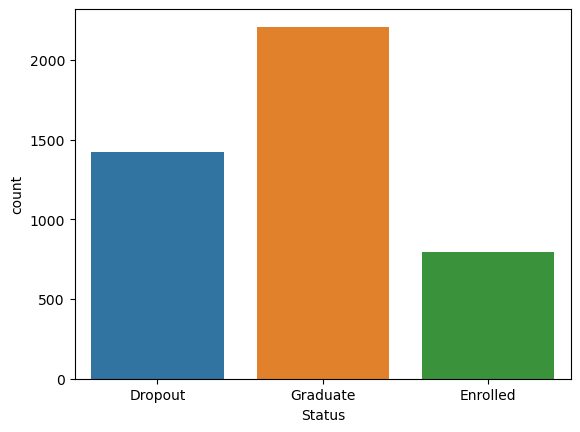

In [8]:
sns.countplot(df, x = 'Status', hue = 'Status')

**Penemuan awal:**

Pada kolom yang akan dilakukan prediksi, ada *class imbalance* dengan status *Graduate* menjadi yang paling banyak dan *Enrolled* menjadi yang paling sedikit. Perbedaan angka pada kelas terdapat pada jumlah lebih dari 2000

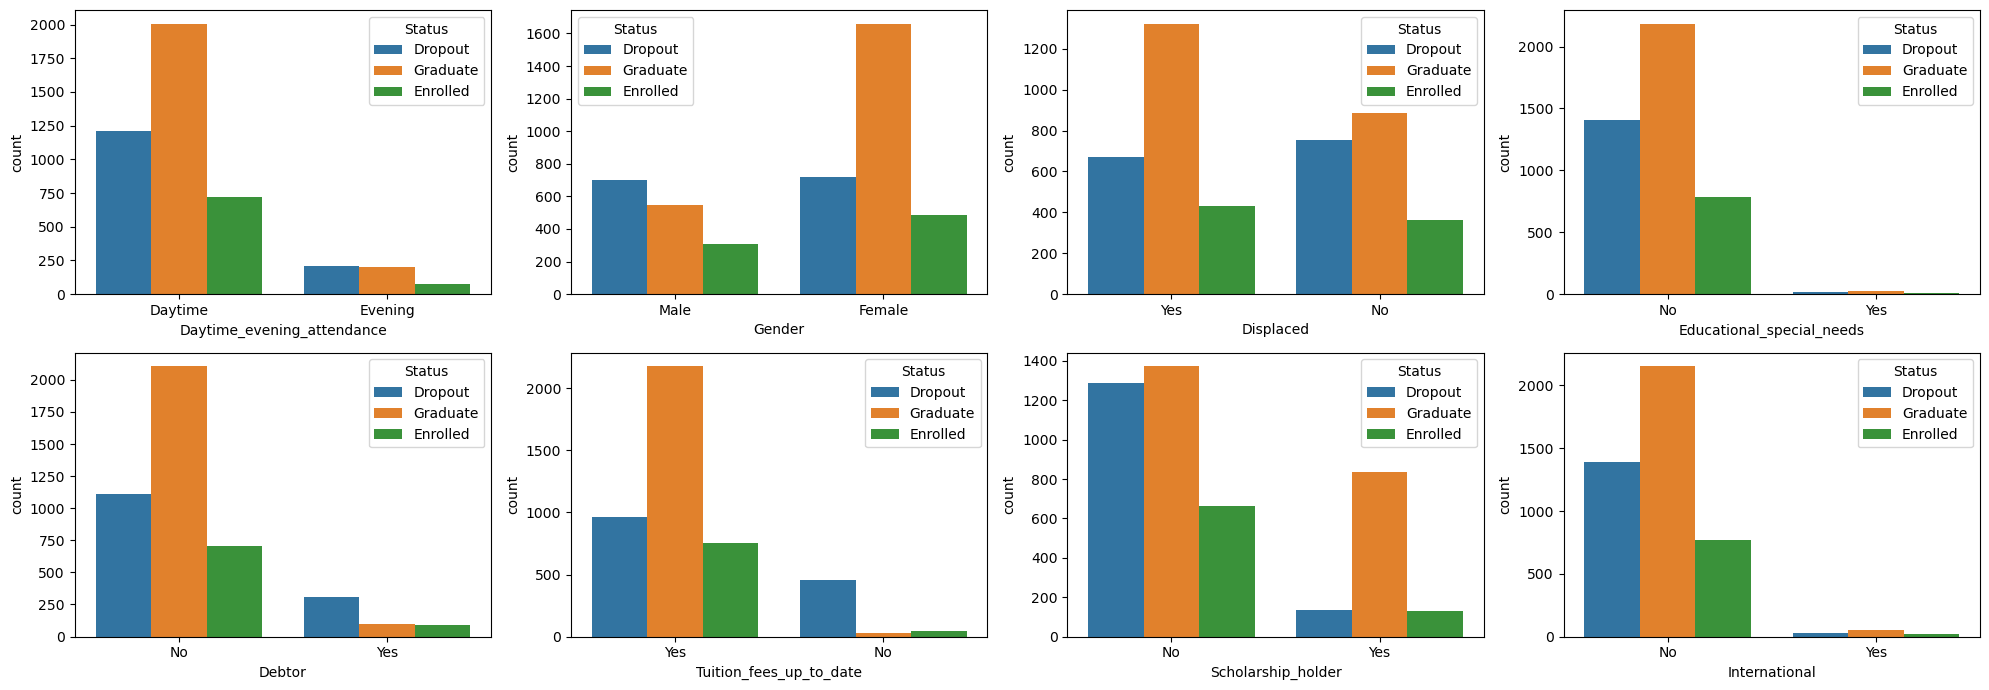

In [9]:
binary_features = ['Daytime_evening_attendance',
                   'Gender', 
                   'Displaced', 
                   'Educational_special_needs', 
                   'Debtor', 
                   'Tuition_fees_up_to_date', 
                   'Scholarship_holder',
                   'International']
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (20,7))
i = 0
for j in range(2):
    for k in range(4):
        sns.countplot(df_mapped, x = binary_features[i], hue = 'Status', ax = ax[j][k])
        i += 1
fig.tight_layout()    

**Beberapa penemuan penting:**
- Pelajar yang menghadiri kelas malam cenderung lebih mungkin *dropout*
- Sebagian besar pelajar di institusi ini merupakan perempuan, serta laki-laki lebih mungkin *dropout*
- Faktor ekonomi sangat berpengaruh dengan pelajar yang memiliki hutang dan pelajar yang terlambat membayar cenderung lebih mungkin *dropout*
- Sebagian besar pelajar yang memegang beasiswa sudah lulus.

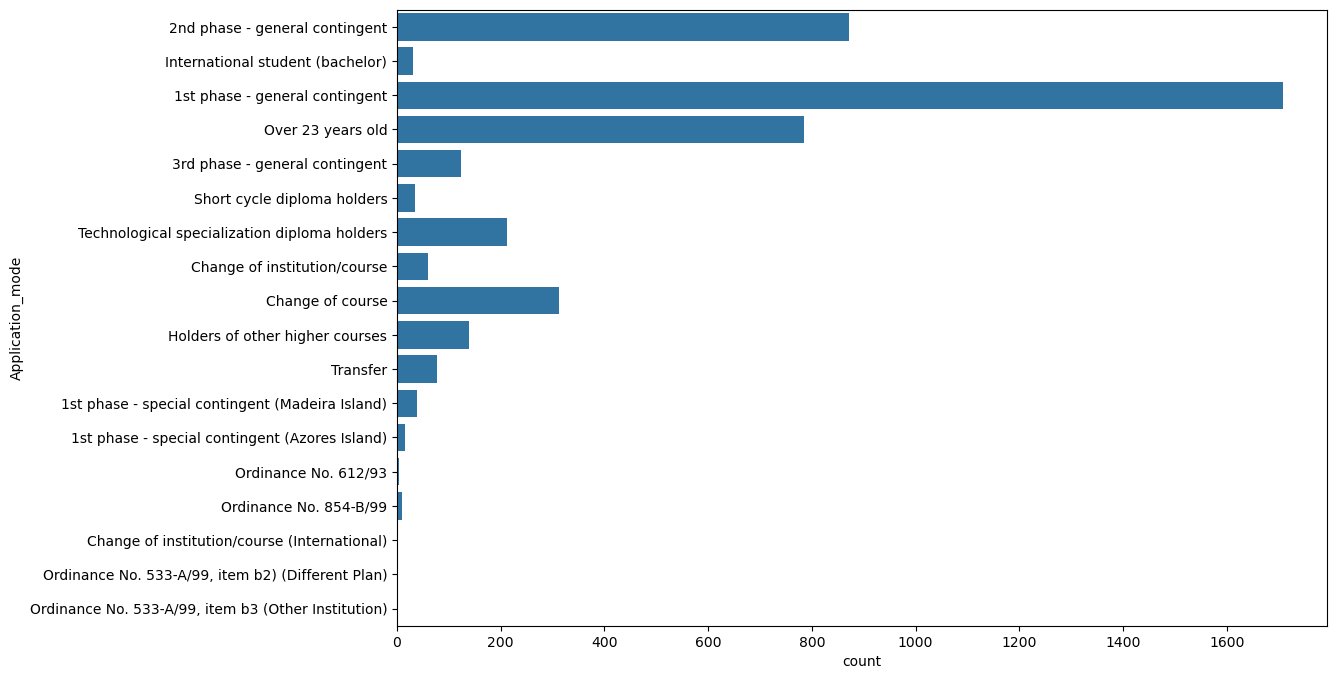

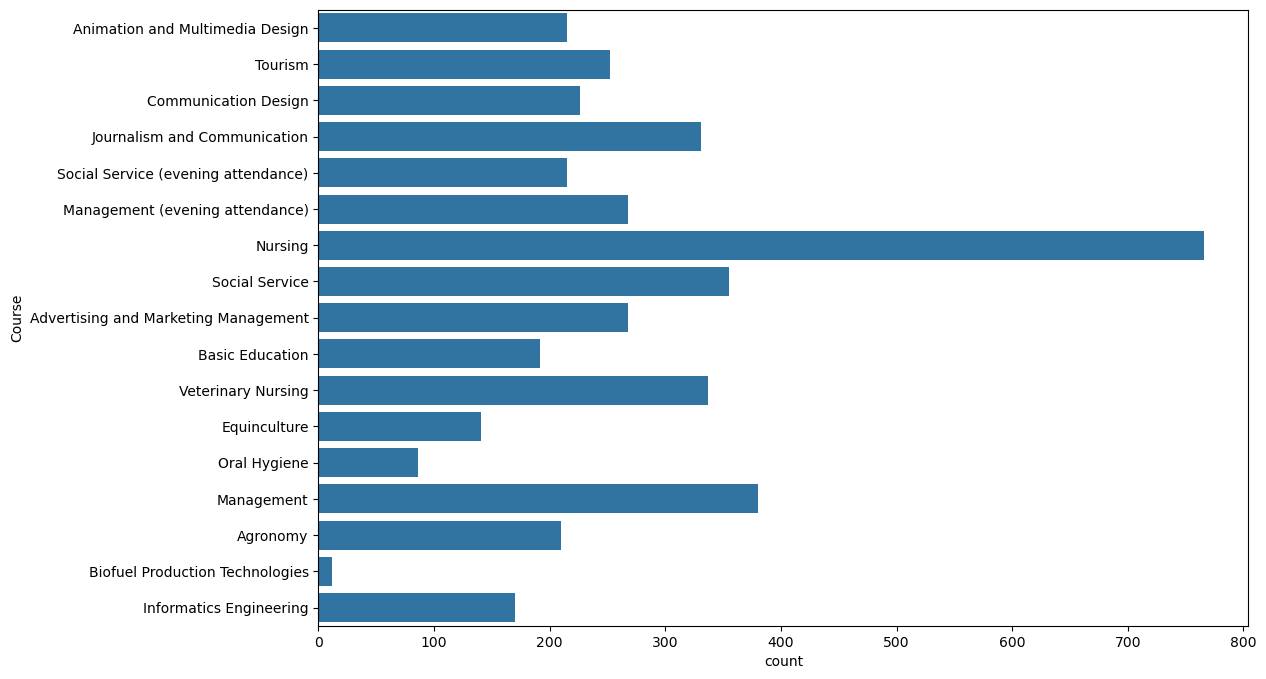

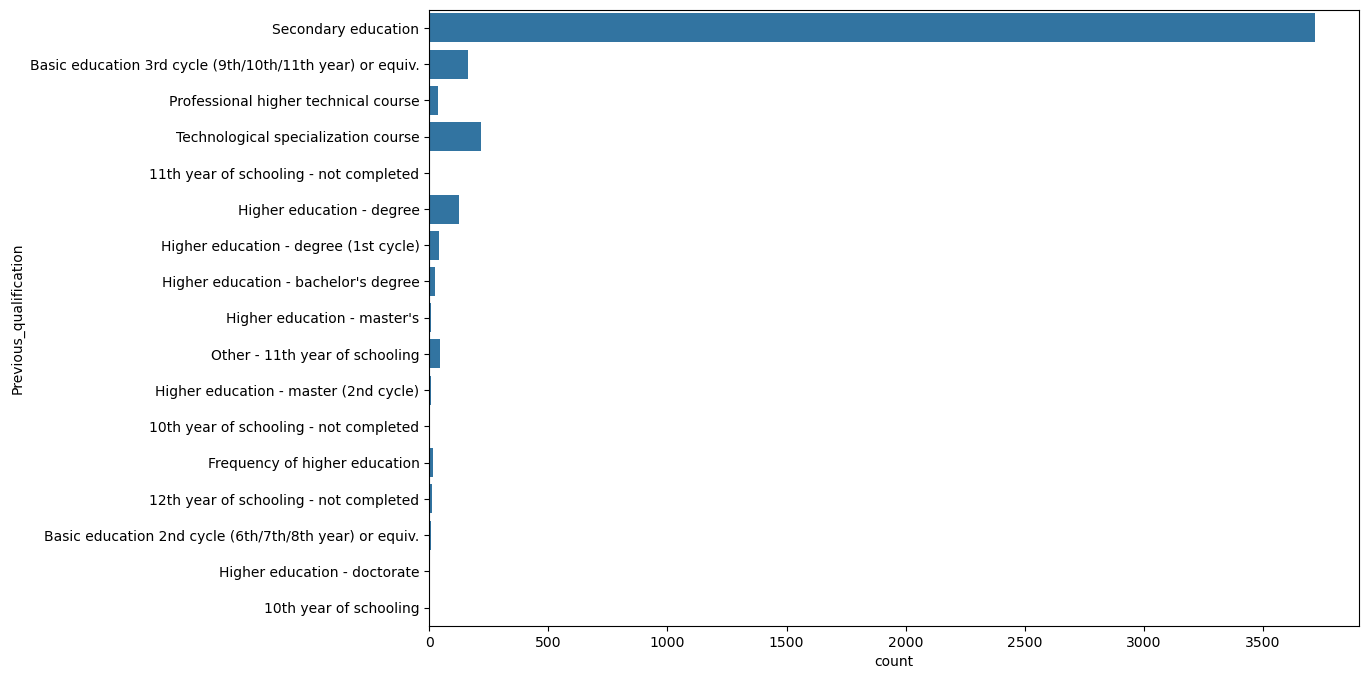

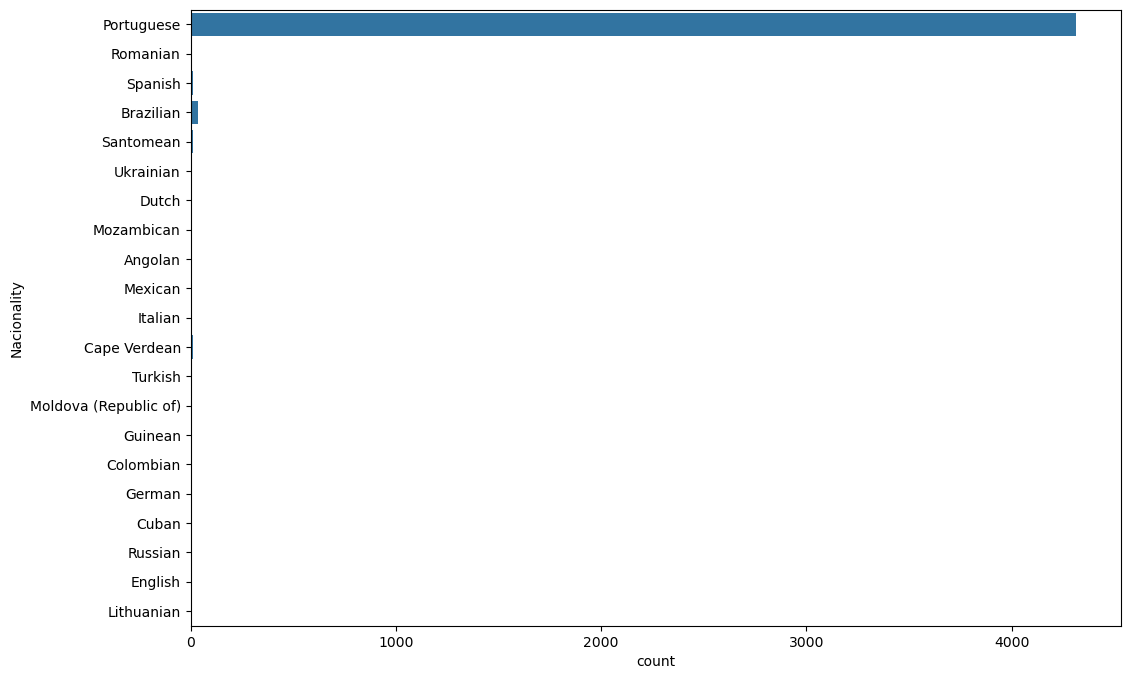

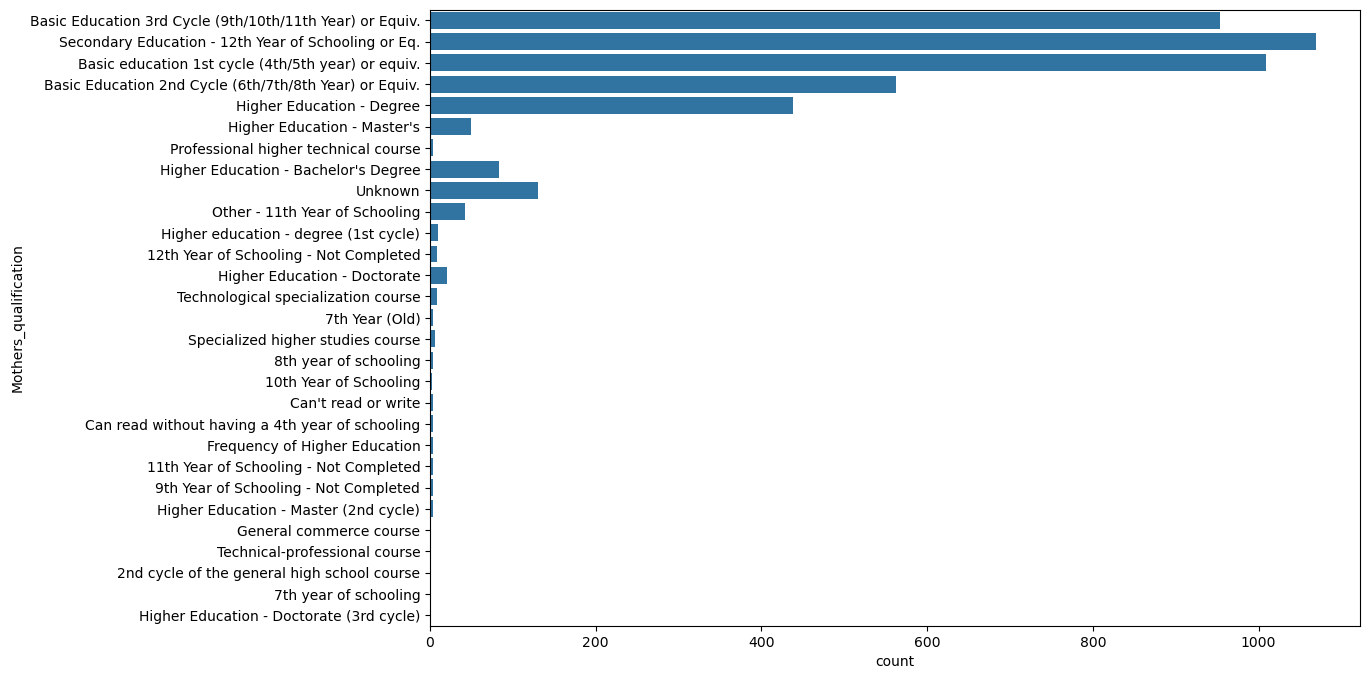

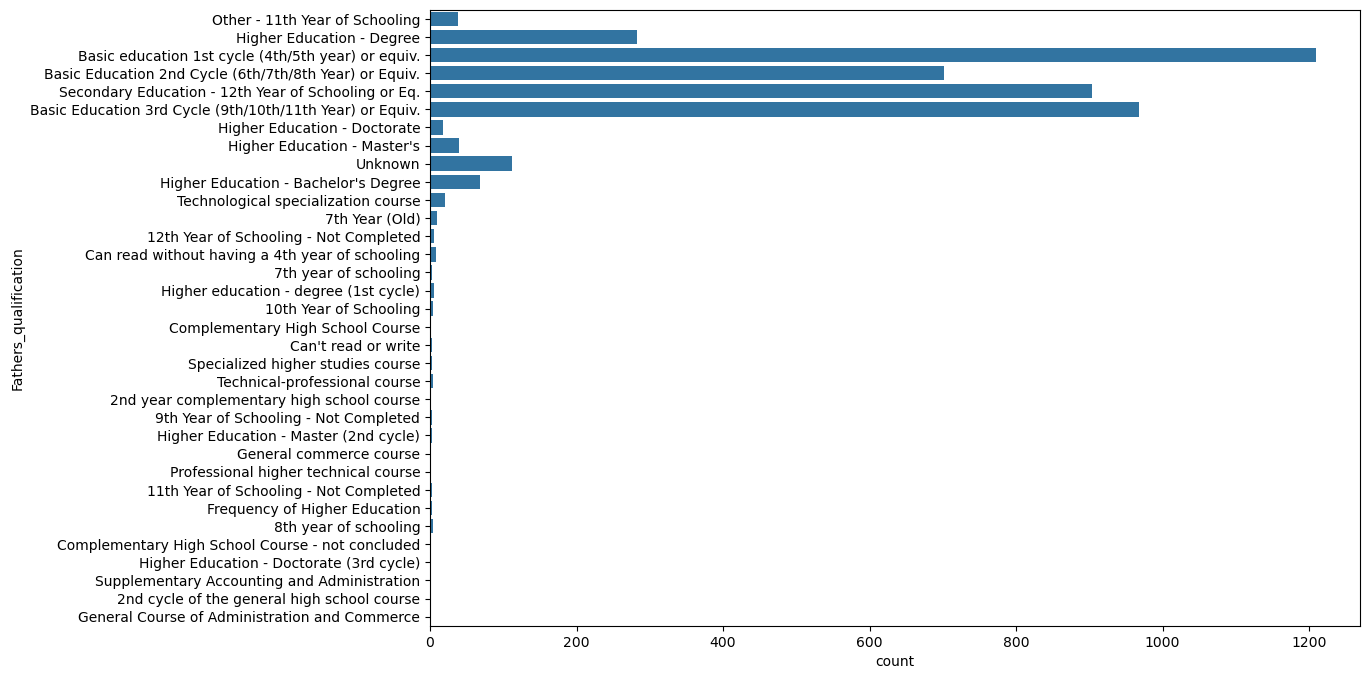

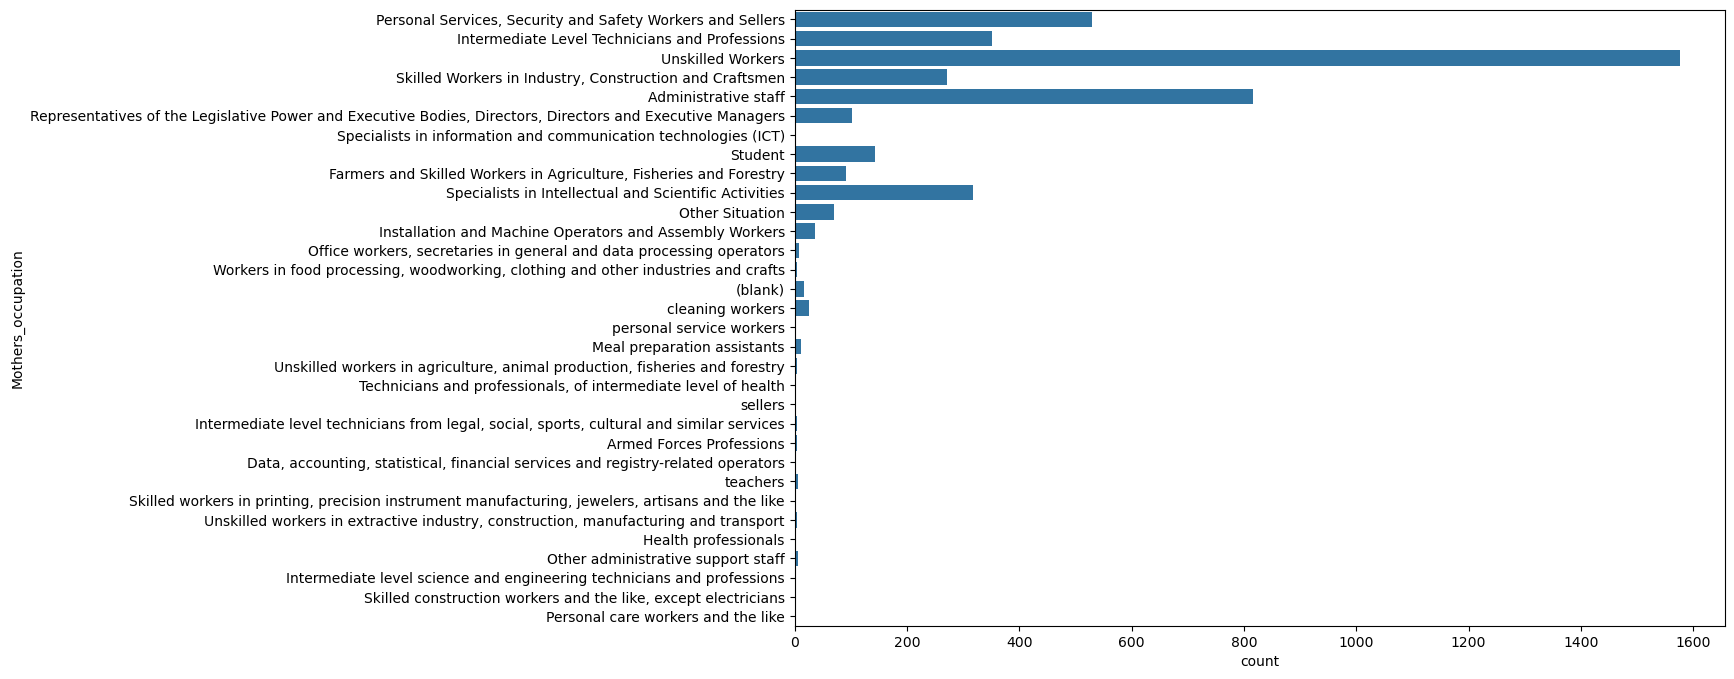

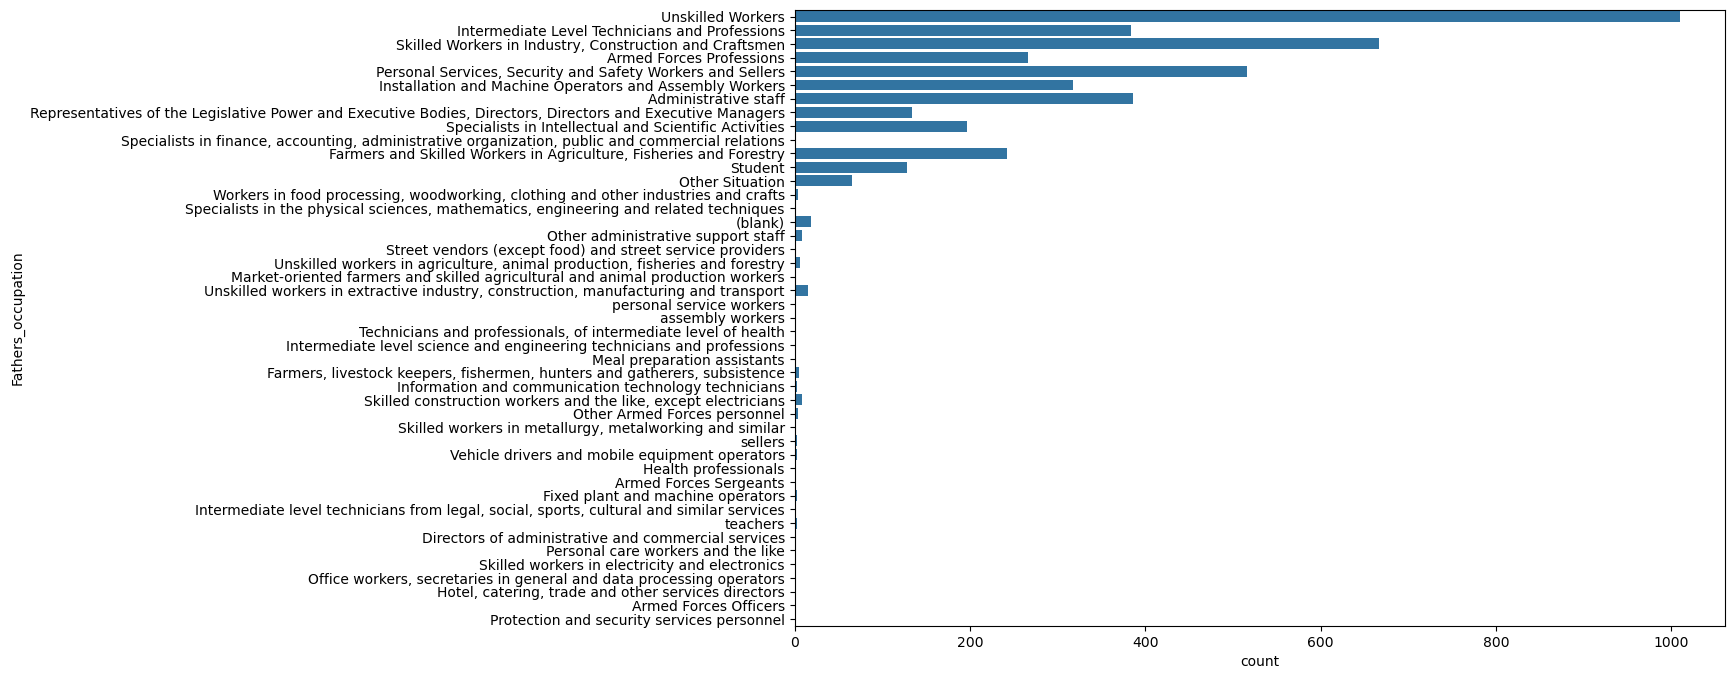

In [10]:
categorical_features = ['Application_mode',
                        'Course',
                        'Previous_qualification',
                        'Nacionality',
                        'Mothers_qualification',
                        'Fathers_qualification',
                        'Mothers_occupation',
                        'Fathers_occupation']
for i in range(len(categorical_features)):
    plt.figure(figsize = (12, 8)) 
    sns.countplot(df_mapped, y = categorical_features[i])
fig.tight_layout()                  

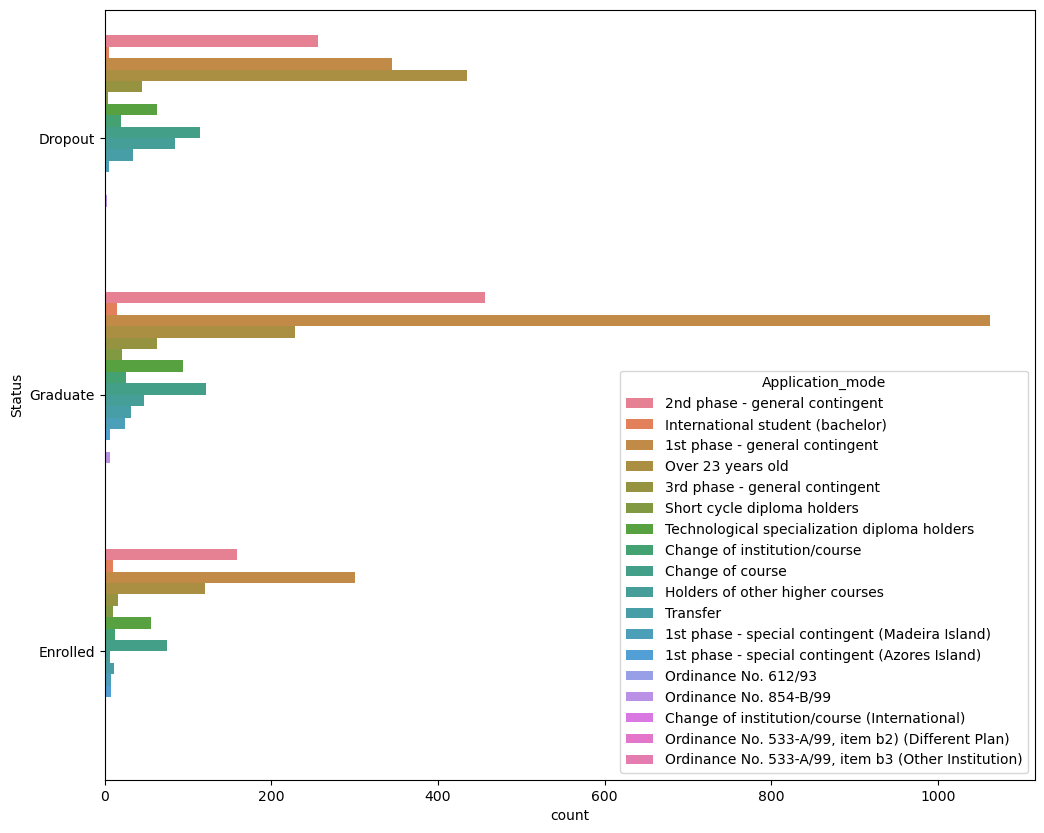

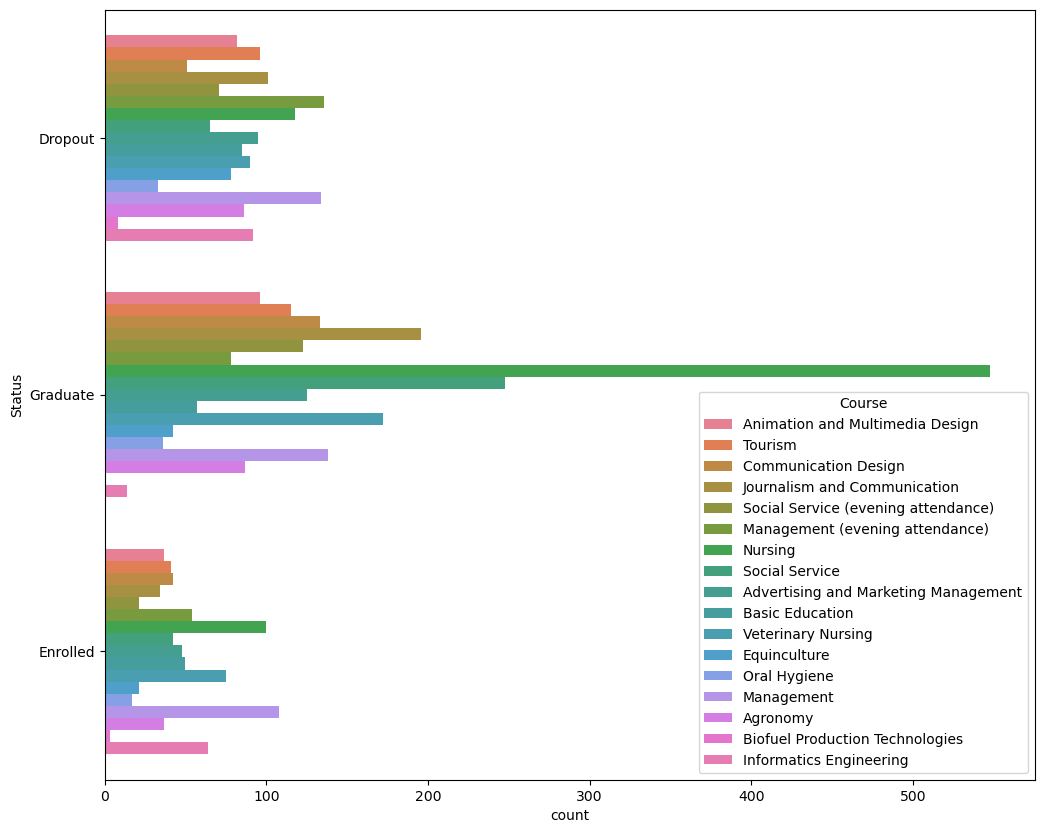

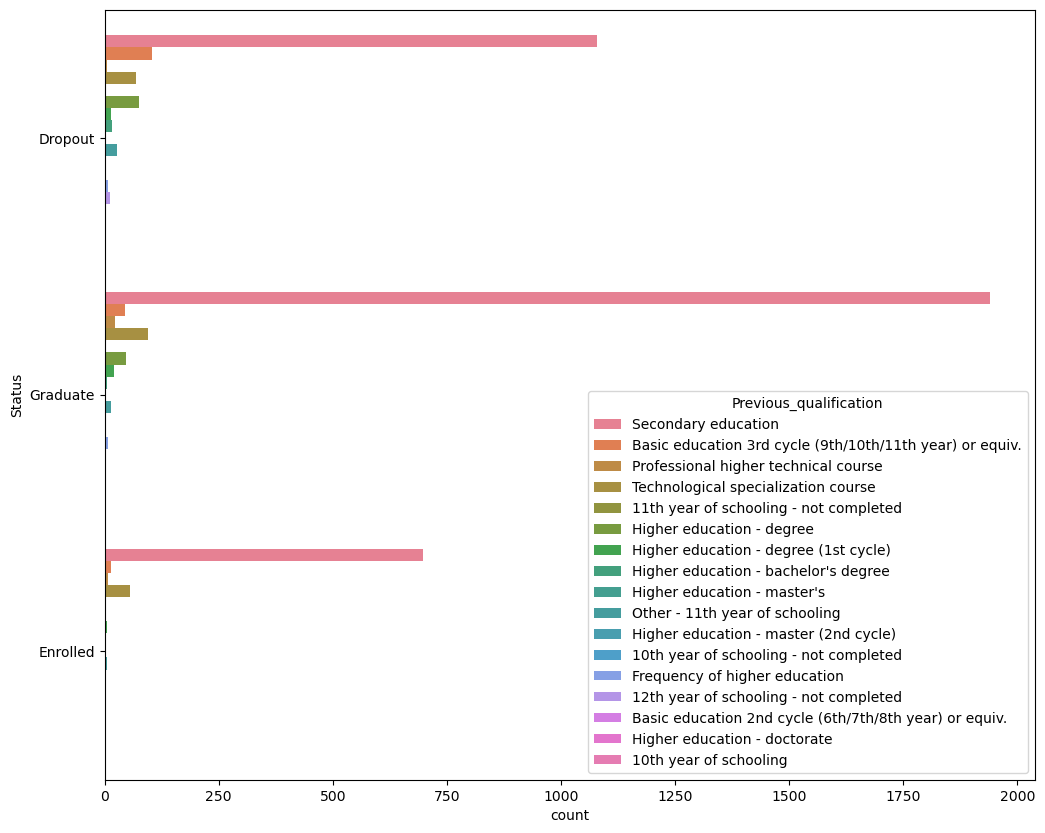

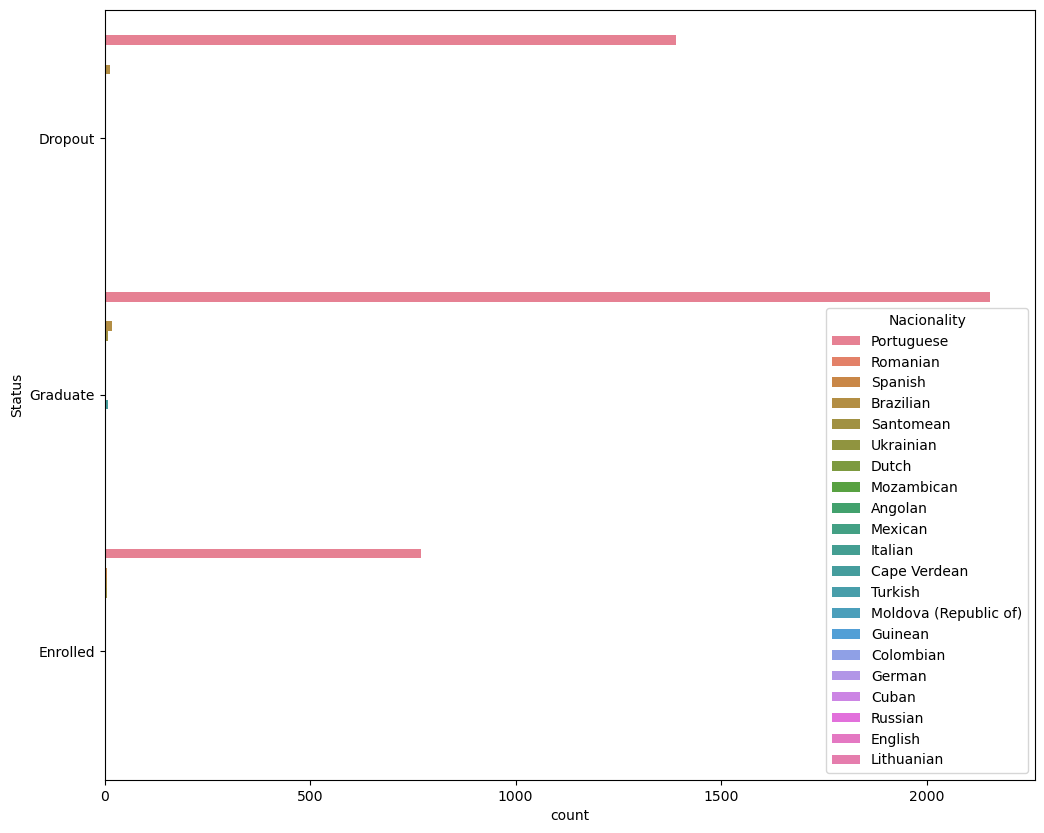

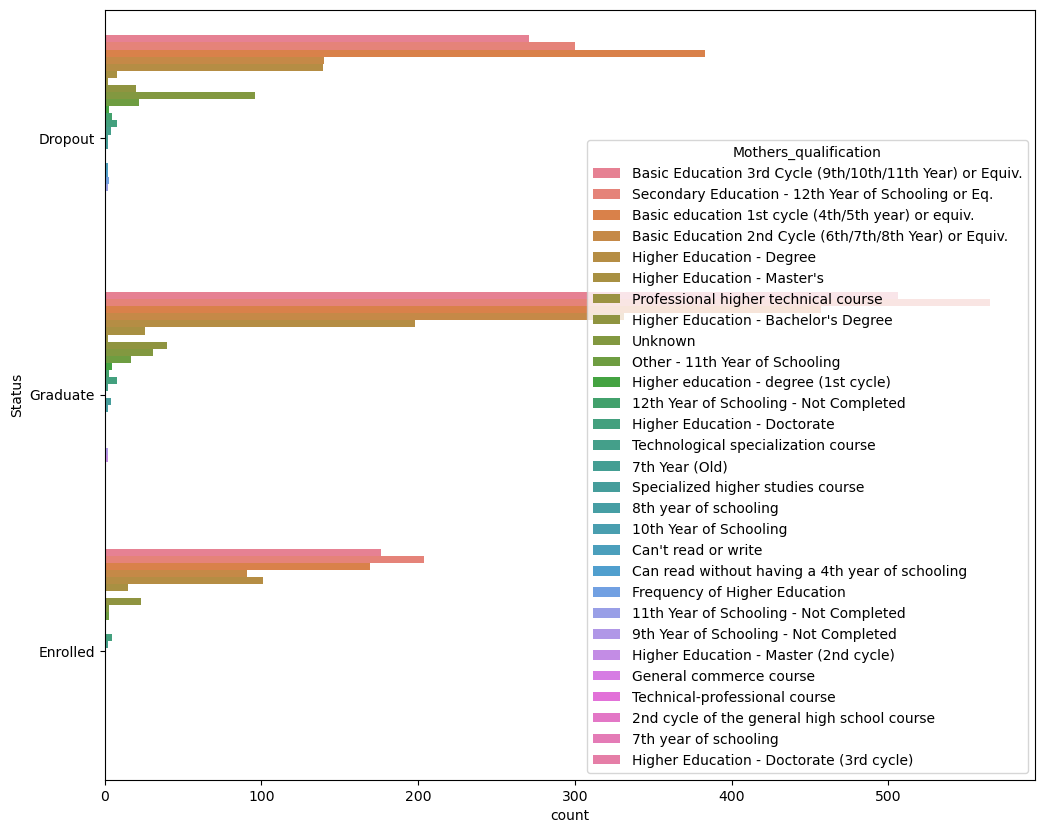

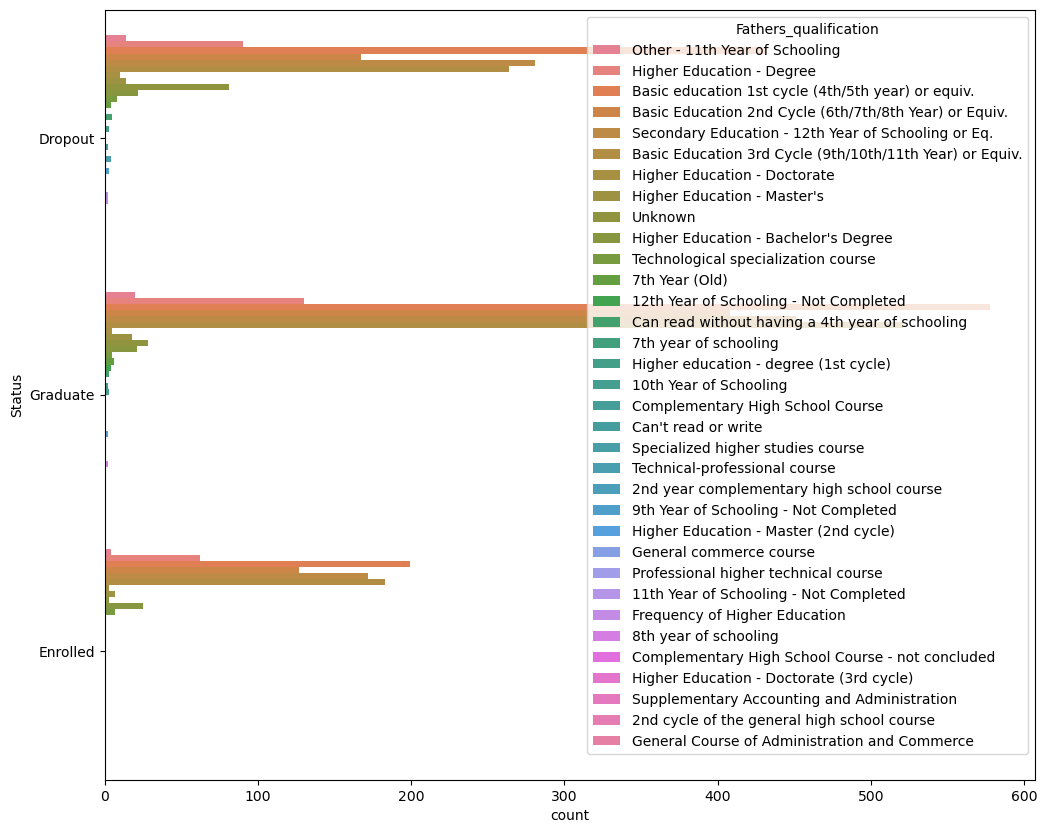

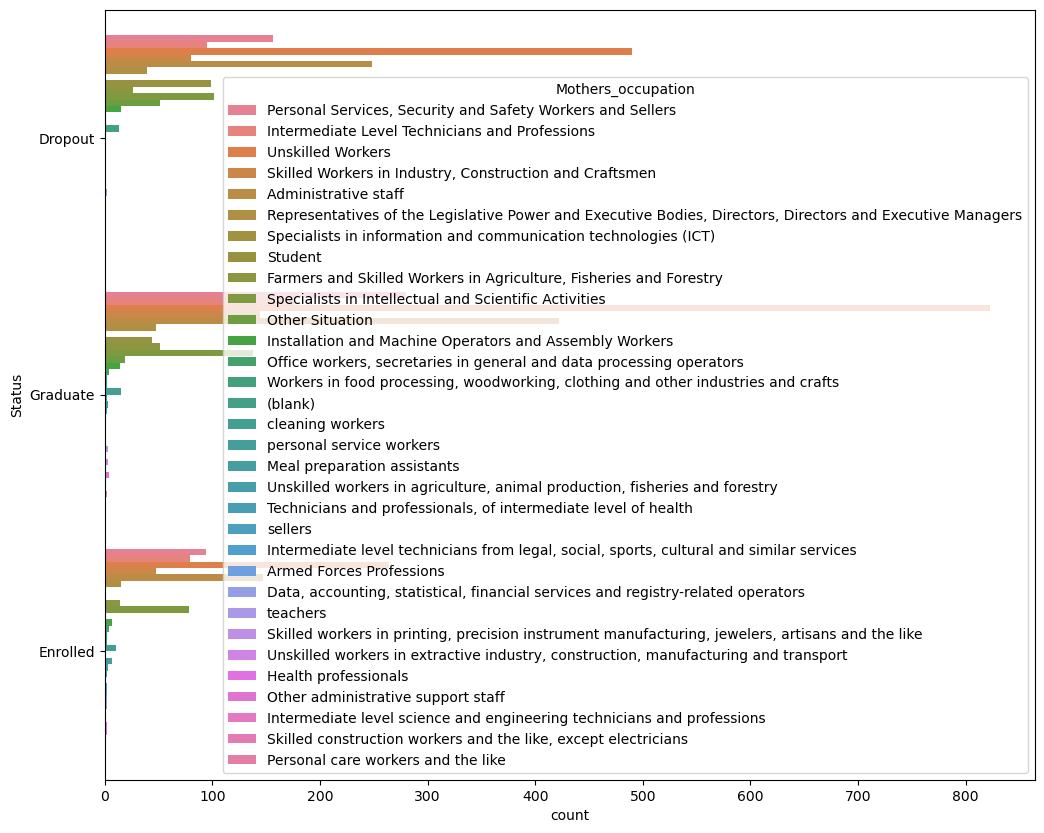

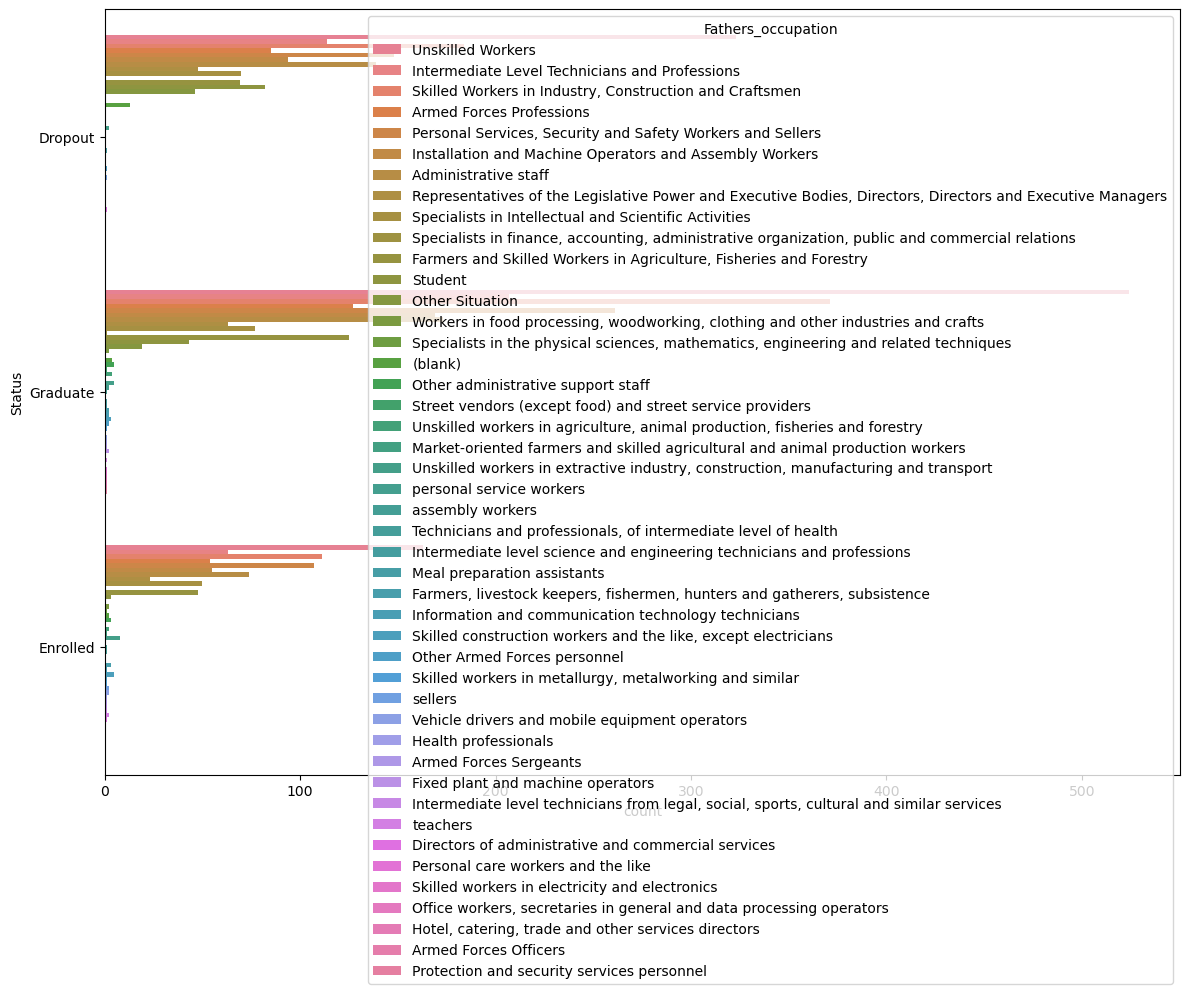

In [11]:
for feature in categorical_features:
    plt.figure(figsize=(12, 10))
    sns.countplot(data = df_mapped, y = 'Status', hue = feature)
    
plt.tight_layout()    
plt.show()
 


**Penemuan aspek demografis:**
- Pelajar yang mendaftar pada jalur *over23 years old* cenderung lebih mungkin *dropout* dan paling banyak mengambil program studi menejemen, baik yang menghadiri kelas malam atau reguler.
- Pelajar yang paling banyak lulus atau *graduate* adalah pelajar yang berasal dari program studi keperawatan dan pelayanan sosial.
- Sebagian besar pelajar memiliki latar belakang pendidikan berupa *secondary education* dan berasal dari Portugis


<Axes: xlabel='Marital_status', ylabel='count'>

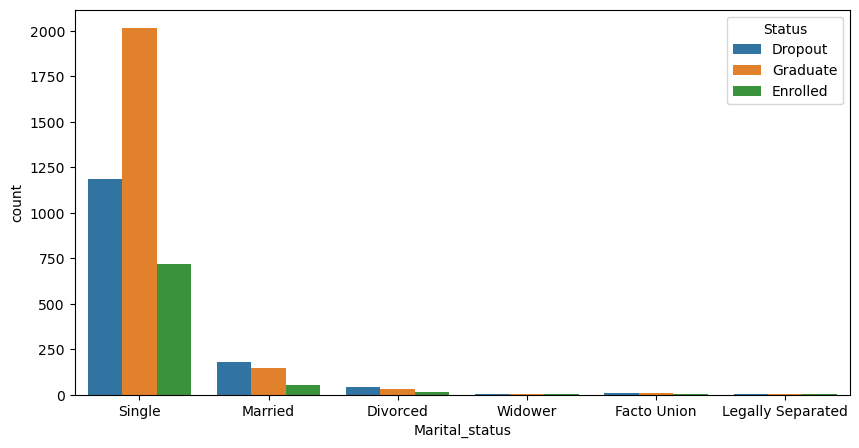

In [12]:
plt.figure(figsize = (10,5))
sns.countplot(df_mapped, x = 'Marital_status', hue = 'Status')

Pelajar yang sudah menikah atau pernah menikah cenderung lebih mungkin untuk *dropout*.

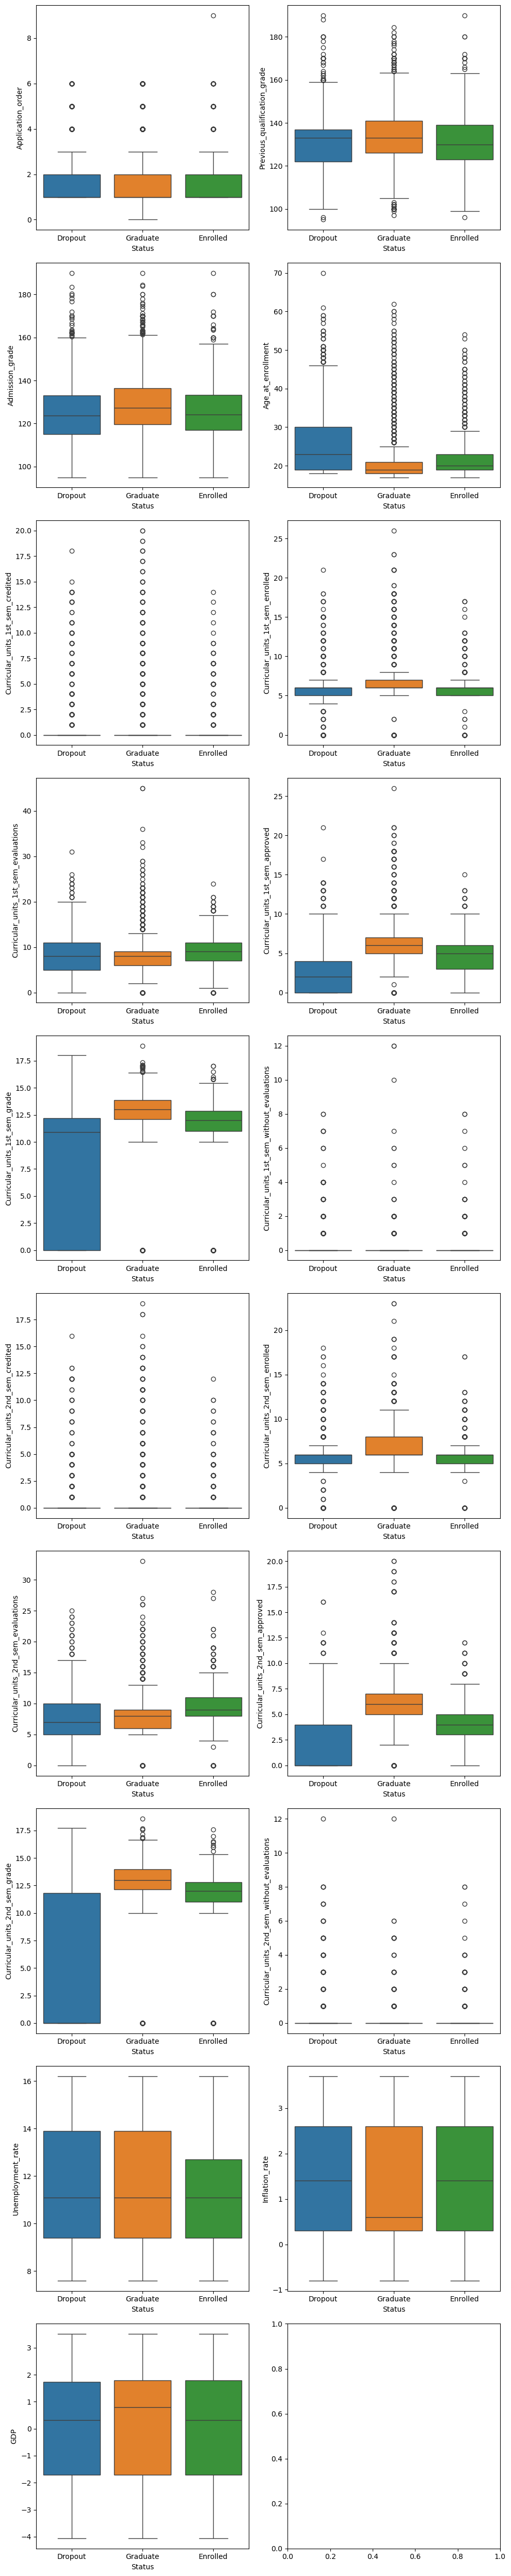

In [13]:
numerical_features = df_mapped.select_dtypes(include=["int64", "float64"]).columns.tolist()

fig, ax = plt.subplots(ncols = 2, nrows = 10, figsize = (10, 50))
i = 0
for j in range(10):
    for k in range(2):
        if i == 19:
            break
        sns.boxplot(df_mapped, x = 'Status', y = numerical_features[i], ax = ax[j][k], hue = 'Status')
        i += 1
fig.tight_layout()

**Penemuan dari sisi Akademik:**
- Pelajar yang mendaftar saat sudah berumur tua cenderung *dropout*.
- Pada semester pertama dan kedua, pelajar yang *dropout* memiliki nilai yang rendah dan cenderung mengambil lebih sedikit kelas.
- Pelajar yang lulus (*graduate*) cenderung memiliki nilai yang lebih tinggi dan mengambil lebih banyak kelas.

### Melihat Korelasi Fitur-Fitur yang Sekiranya Berpengaruh Besar pada Target Status

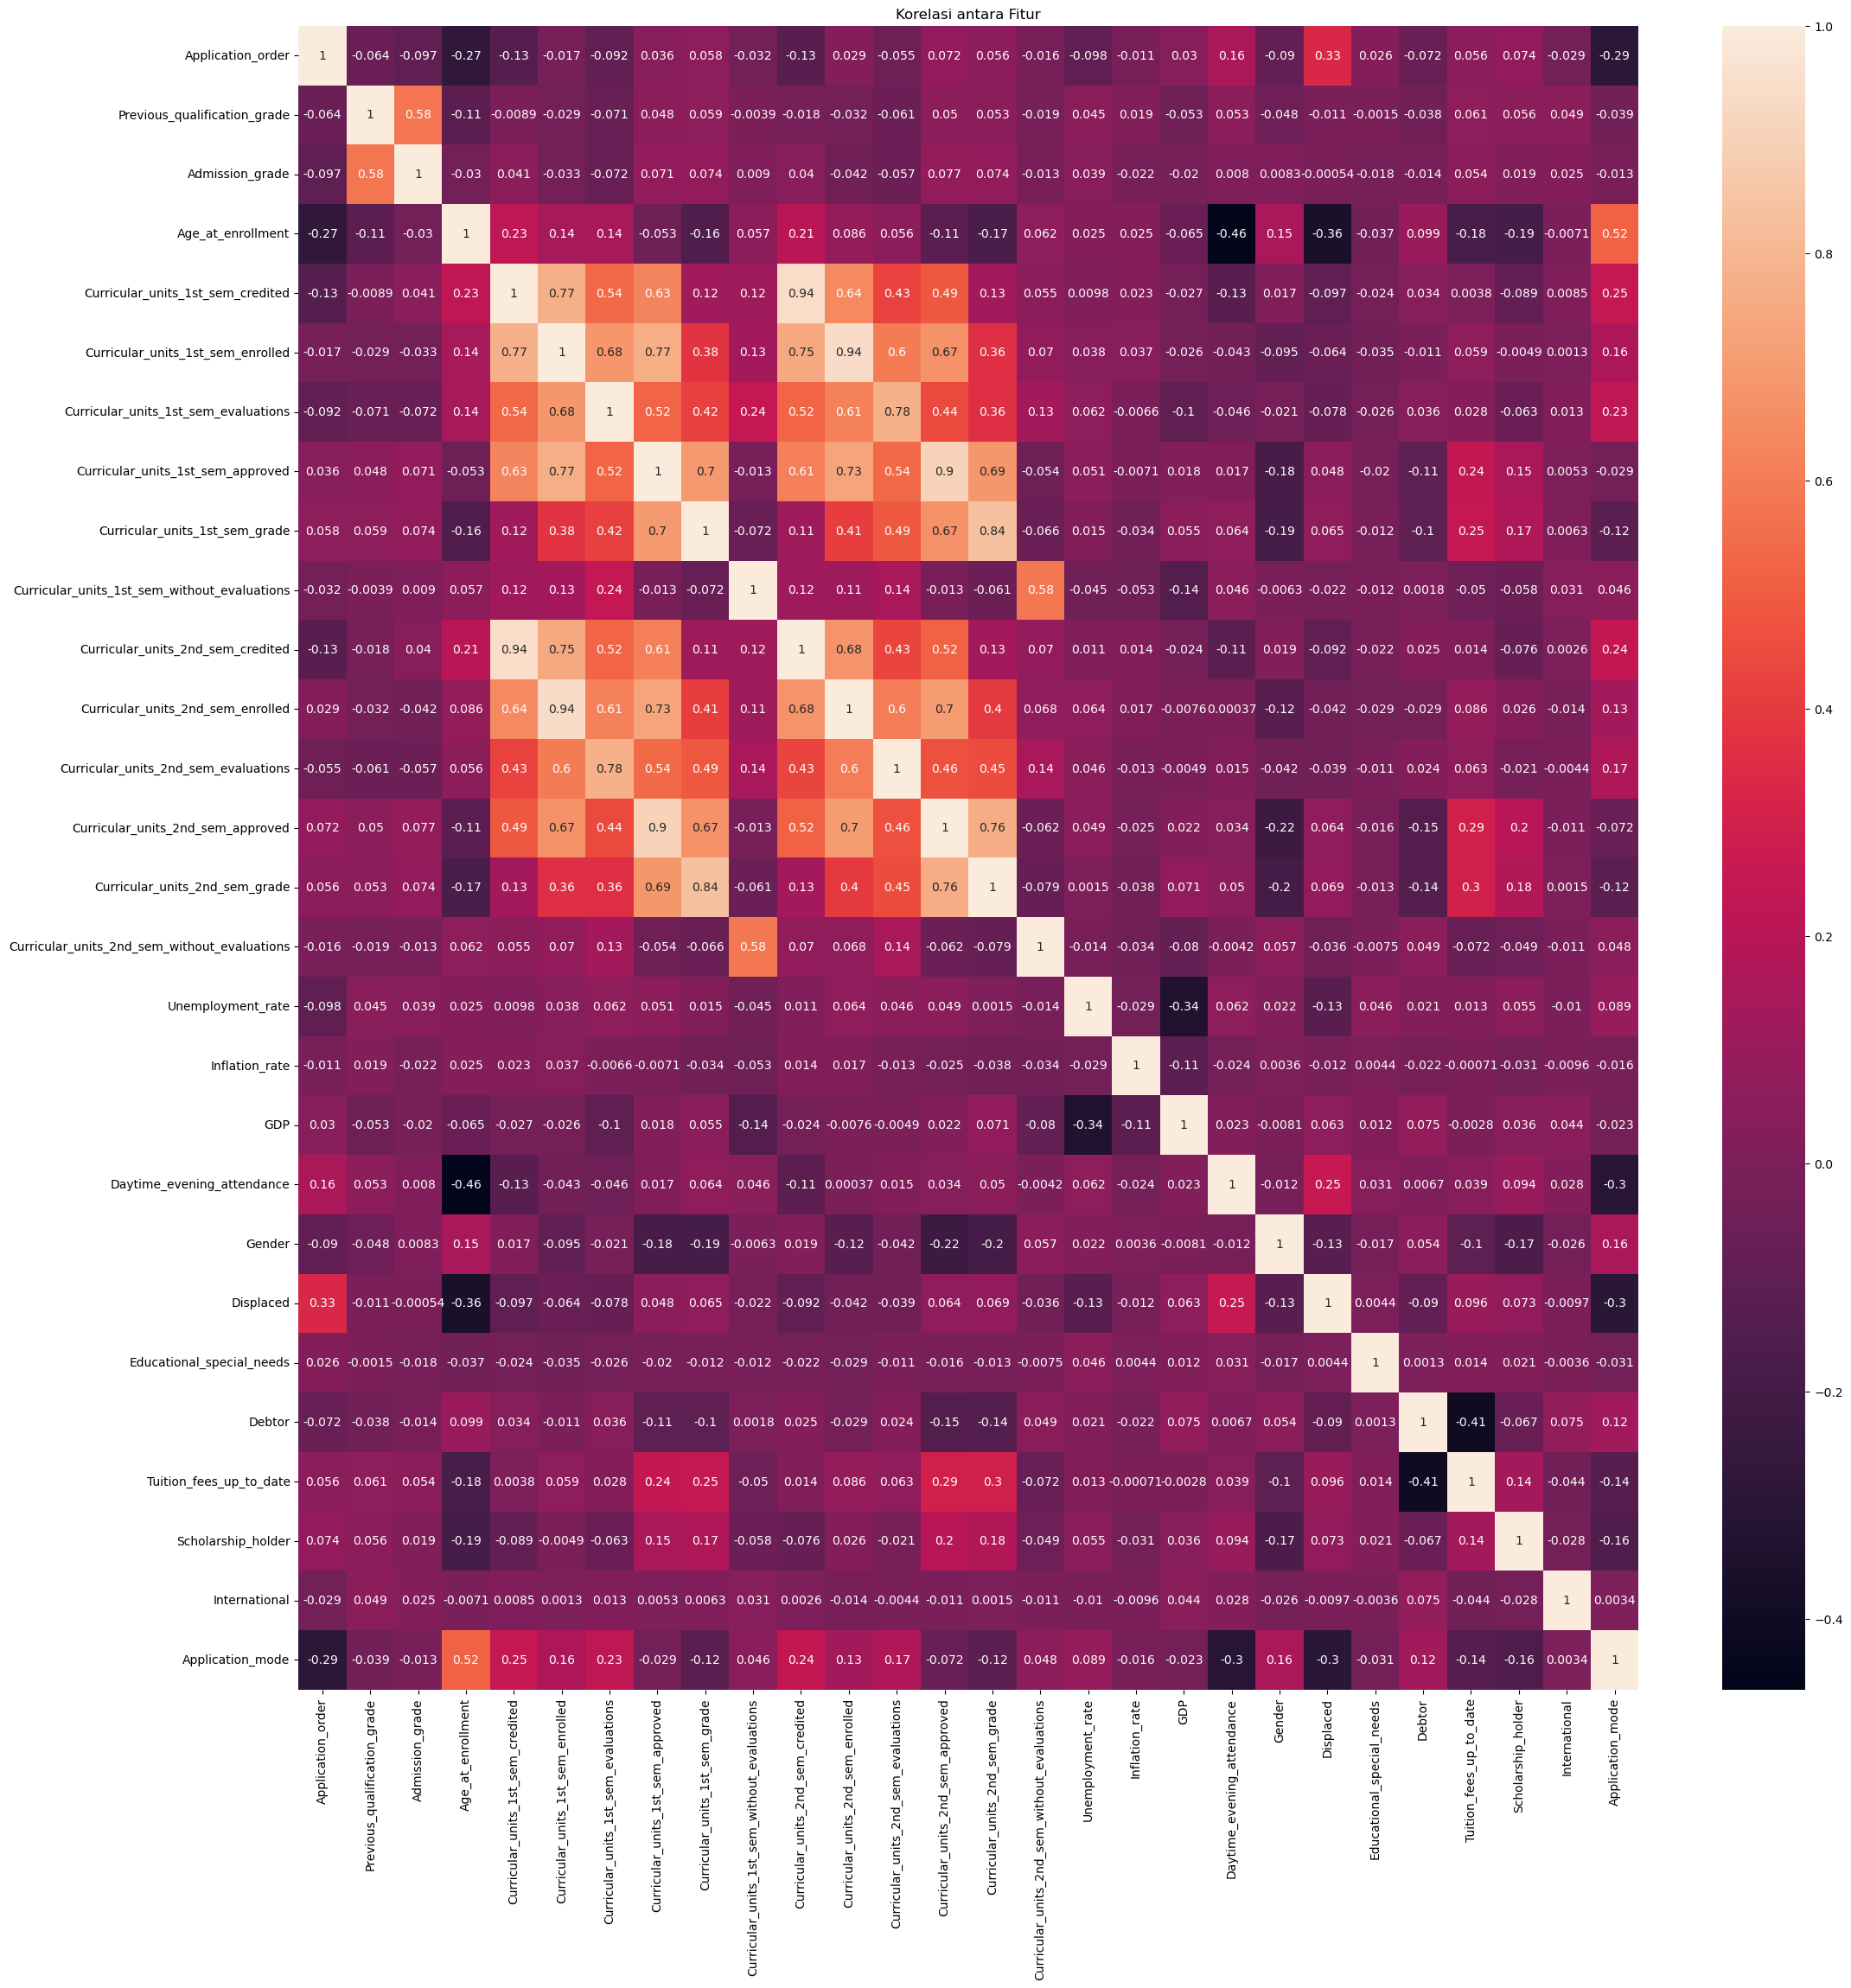

In [14]:
cols = []
for feature in numerical_features:
    cols.append(feature)
for feature in binary_features:
    cols.append(feature)
cols.append('Application_mode')
plt.figure(figsize = (25,25))
corr = df[cols].corr()
sns.heatmap(corr, annot = True)
plt.title("Korelasi antara Fitur")
plt.show()

Dapat dilihat terdapat *co-linearity* pada data. Akan dilakukan proses PCA untuk mengekstrak informasi terpenting dan mengurangi tingginya dimensi akibat *co-linearity* tersebut.

In [15]:
pairs = corr.unstack()
filtered__pairs = pairs[(pairs.index.get_level_values(0) != pairs.index.get_level_values(1))].drop_duplicates()
sorted_pairs = filtered__pairs.sort_values(ascending=False)
sorted_df = sorted_pairs.reset_index()
sorted_df.columns = ['Fitur 1', 'Fitur 2', 'Nilai Korelasi']
selected_pairs = sorted_df[(sorted_df['Nilai Korelasi'] >= 0.5) | (sorted_df['Nilai Korelasi'] <= -0.5)]
selected_pairs

Fitur 1  \
0              Curricular_units_1st_sem_credited   
1              Curricular_units_1st_sem_enrolled   
2              Curricular_units_1st_sem_approved   
3                 Curricular_units_1st_sem_grade   
4           Curricular_units_1st_sem_evaluations   
5              Curricular_units_1st_sem_credited   
6              Curricular_units_1st_sem_enrolled   
7              Curricular_units_2nd_sem_approved   
8              Curricular_units_1st_sem_enrolled   
9              Curricular_units_1st_sem_approved   
10             Curricular_units_2nd_sem_enrolled   
11             Curricular_units_1st_sem_approved   
12             Curricular_units_1st_sem_approved   
13             Curricular_units_1st_sem_enrolled   
14             Curricular_units_2nd_sem_credited   
15             Curricular_units_1st_sem_enrolled   
16                Curricular_units_1st_sem_grade   
17             Curricular_units_1st_sem_credited   
18             Curricular_units_1st_sem_credited   
19          Curricular_units_1st_sem_evaluations   
20             Curricular_units_1st_sem_approved   
21             Curricular_units_2nd_sem_enrolled   
22             Curricular_units_1st_sem_enrolled   
23  Curricular_units_1st_sem_without_evaluations   
24                  Previous_qualification_grade   
25             Curricular_units_1st_sem_credited   
26             Curricular_units_1st_sem_approved   
27          Curricular_units_1st_sem_evaluations   
28          Curricular_units_1st_sem_evaluations   
29             Curricular_units_2nd_sem_credited   
30                             Age_at_enrollment   

                                         Fitur 2  Nilai Korelasi  
0              Curricular_units_2nd_sem_credited        0.944811  
1              Curricular_units_2nd_sem_enrolled        0.942627  
2              Curricular_units_2nd_sem_approved        0.904002  
3                 Curricular_units_2nd_sem_grade        0.837170  
4           Curricular_units_2nd_sem_evaluations        0.778863  
5              Curricular_units_1st_sem_enrolled        0.774344  
6              Curricular_units_1st_sem_approved        0.769083  
7                 Curricular_units_2nd_sem_grade        0.760804  
8              Curricular_units_2nd_sem_credited        0.753747  
9              Curricular_units_2nd_sem_enrolled        0.733772  
10             Curricular_units_2nd_sem_approved        0.703258  
11                Curricular_units_1st_sem_grade        0.696113  
12                Curricular_units_2nd_sem_grade        0.685560  
13          Curricular_units_1st_sem_evaluations        0.680220  
14             Curricular_units_2nd_sem_enrolled        0.676258  
15             Curricular_units_2nd_sem_approved        0.673341  
16             Curricular_units_2nd_sem_approved        0.673335  
17             Curricular_units_2nd_sem_enrolled        0.644826  
18             Curricular_units_1st_sem_approved        0.628394  
19             Curricular_units_2nd_sem_enrolled        0.611842  
20             Curricular_units_2nd_sem_credited        0.607661  
21          Curricular_units_2nd_sem_evaluations        0.604821  
22          Curricular_units_2nd_sem_evaluations        0.599567  
23  Curricular_units_2nd_sem_without_evaluations        0.583261  
24                               Admission_grade        0.580444  
25          Curricular_units_1st_sem_evaluations        0.542919  
26          Curricular_units_2nd_sem_evaluations        0.539934  
27             Curricular_units_1st_sem_approved        0.522396  
28             Curricular_units_2nd_sem_credited        0.522187  
29             Curricular_units_2nd_sem_approved        0.519081  
30                              Application_mode        0.516243

Terdapat 31 fitur yang memiliki korelasi lebih dari 50%, dan ada 2 area co-linearity: pada data akademik saat studi dan data akademik saat mendaftar.

## 3. Pra-Pemrosesan
### Membuat DataFrame dengan Fitur yang Penting

In [16]:
new_df = df_mapped.drop(columns=["Marital_status",
                                 "Previous_qualification", 
                                 "Nacionality", 
                                 "Mothers_qualification",
                                 "Fathers_qualification",
                                 "Mothers_occupation", 
                                 "Fathers_occupation", 
                                 "Educational_special_needs", 
                                 "International",
                                 "Application_order", 
                                 "Curricular_units_1st_sem_credited", 
                                 "Curricular_units_1st_sem_without_evaluations", 
                                 "Curricular_units_2nd_sem_credited", 
                                 "Curricular_units_2nd_sem_without_evaluations", 
                                 "Unemployment_rate", 
                                 "Inflation_rate", 
                                 "GDP"], axis=1)
new_df

Application_mode                               Course  \
0       2nd phase - general contingent      Animation and Multimedia Design   
1     International student (bachelor)                              Tourism   
2       1st phase - general contingent                 Communication Design   
3       2nd phase - general contingent         Journalism and Communication   
4                    Over 23 years old  Social Service (evening attendance)   
...                                ...                                  ...   
4419    1st phase - general contingent         Journalism and Communication   
4420    1st phase - general contingent         Journalism and Communication   
4421    1st phase - general contingent                              Nursing   
4422    1st phase - general contingent                           Management   
4423            Ordinance No. 854-B/99         Journalism and Communication   

     Daytime_evening_attendance  Previous_qualification_grade  \
0                       Daytime                         122.0   
1                       Daytime                         160.0   
2                       Daytime                         122.0   
3                       Daytime                         122.0   
4                       Evening                         100.0   
...                         ...                           ...   
4419                    Daytime                         125.0   
4420                    Daytime                         120.0   
4421                    Daytime                         154.0   
4422                    Daytime                         180.0   
4423                    Daytime                         152.0   

      Admission_grade Displaced Debtor Tuition_fees_up_to_date  Gender  \
0               127.3       Yes     No                     Yes    Male   
1               142.5       Yes     No                      No    Male   
2               124.8       Yes     No                      No    Male   
3               119.6       Yes     No                     Yes  Female   
4               141.5        No     No                     Yes  Female   
...               ...       ...    ...                     ...     ...   
4419            122.2        No     No                     Yes    Male   
4420            119.0       Yes    Yes                      No  Female   
4421            149.5       Yes     No                     Yes  Female   
4422            153.8       Yes     No                     Yes  Female   
4423            152.0       Yes     No                     Yes  Female   

     Scholarship_holder  Age_at_enrollment  Curricular_units_1st_sem_enrolled  \
0                    No                 20                                  0   
1                    No                 19                                  6   
2                    No                 19                                  6   
3                    No                 20                                  6   
4                    No                 45                                  6   
...                 ...                ...                                ...   
4419                 No                 19                                  6   
4420                 No                 18                                  6   
4421                Yes                 30                                  7   
4422                Yes                 20                                  5   
4423                 No                 22                                  6   

      Curricular_units_1st_sem_evaluations  Curricular_units_1st_sem_approved  \
0                                        0                                  0   
1                                        6                                  6   
2                                        0                                  0   
3                                        8                                  6   
4                        

### Melakukan Pemisahan Dataframe untuk Train dan Test
80% untuk train, 20% untuk test.

In [17]:
train_df, test_df = train_test_split(new_df, test_size = 0.2, random_state = 42, shuffle = True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
 
print(train_df.shape)
print(test_df.shape)

(3539, 20)
(885, 20)


### Melakukan Sampling untuk Class Imbalance
Strategi Sampling akan tetap mempertahankan urutan bahwa status Graduate akan menjadi status mayoritas dan status Enrolled akan menjadi status minoritas. Akan tetapi, perbedaan jumlah kelas tidak akan terlalu besar.

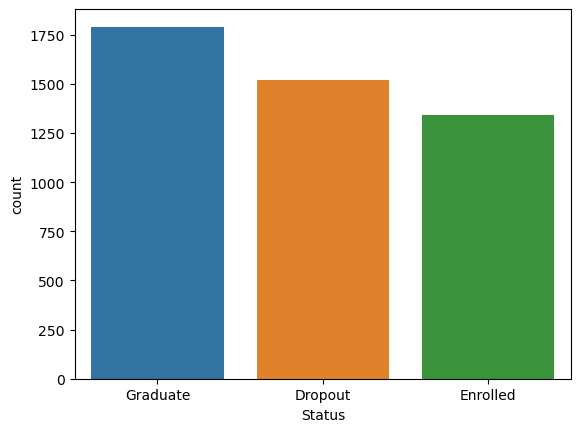

In [18]:
df_majority_1 = train_df[(train_df.Status == "Graduate")]
df_majority_2 = train_df[(train_df.Status == "Dropout")]
df_minority = train_df[(train_df.Status == "Enrolled")]
 
 
df_majority_2_oversampled = resample(df_majority_2, n_samples=int(len(df_majority_1) * 0.85), random_state=42)
df_minority_oversampled = resample(df_minority, n_samples=int(len(df_majority_1)*0.75), random_state=42)
 
oversampled_train_df = pd.concat([df_majority_1, df_majority_2_oversampled]).reset_index(drop=True)
oversampled_train_df = pd.concat([oversampled_train_df, df_minority_oversampled]).reset_index(drop=True)
oversampled_train_df = shuffle(oversampled_train_df, random_state=42)
oversampled_train_df.reset_index(drop=True, inplace=True)
 
sns.countplot(data=oversampled_train_df, x="Status", hue = 'Status')
plt.show()

In [19]:
# Pemisahan Fitur dan Target
X_train = oversampled_train_df.drop(columns="Status", axis=1)
y_train = oversampled_train_df["Status"]
 
X_test = test_df.drop(columns="Status", axis=1)
y_test = test_df["Status"]

In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4656 entries, 0 to 4655
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Application_mode                      4656 non-null   object 
 1   Course                                4656 non-null   object 
 2   Daytime_evening_attendance            4656 non-null   object 
 3   Previous_qualification_grade          4656 non-null   float64
 4   Admission_grade                       4656 non-null   float64
 5   Displaced                             4656 non-null   object 
 6   Debtor                                4656 non-null   object 
 7   Tuition_fees_up_to_date               4656 non-null   object 
 8   Gender                                4656 non-null   object 
 9   Scholarship_holder                    4656 non-null   object 
 10  Age_at_enrollment                     4656 non-null   int64  
 11  Curricular_units_

In [49]:
# Fungsi untuk melakukan standardization dan encoding
def scaling(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = StandardScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
            
            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
        return df
 
def encoding(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))
            
            df_test["{}".format(feature)] = encoder.transform(df_test[feature])
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))
        return df

In [22]:
# Mengubah dataset sesuai fitur
categorical_columns = ['Application_mode', 
                     'Course',
                     'Daytime_evening_attendance',
                     'Displaced',
                     'Debtor',                                
                     'Tuition_fees_up_to_date',
                     'Gender',
                     'Scholarship_holder']
 
numerical_columns = ['Previous_qualification_grade',
                       'Admission_grade',
                       'Age_at_enrollment',
                       'Curricular_units_1st_sem_enrolled',
                       'Curricular_units_1st_sem_evaluations',
                       'Curricular_units_1st_sem_approved',     
                       'Curricular_units_1st_sem_grade',
                       'Curricular_units_2nd_sem_enrolled',
                       'Curricular_units_2nd_sem_evaluations',
                       'Curricular_units_2nd_sem_approved',
                       'Curricular_units_2nd_sem_grade']
 
new_train_df, new_test_df = scaling(numerical_columns, X_train, X_test)
new_train_df, new_test_df = encoding(categorical_columns, new_train_df, new_test_df)
new_train_df

Application_mode  Course  Daytime_evening_attendance  \
0                    0       3                           0   
1                    0      16                           0   
2                   16       1                           0   
3                    3       0                           0   
4                    0      15                           0   
...                ...     ...                         ...   
4651                14      14                           1   
4652                 0      16                           0   
4653                17      12                           0   
4654                16      16                           0   
4655                 0       2                           0   

      Previous_qualification_grade  Admission_grade  Displaced  Debtor  \
0                        -1.293080        -1.241543          0       0   
1                         1.776353         1.674757          1       0   
2                        -0.170117         0.253996          1       0   
3                         0.204204         0.050059          1       0   
4                         0.578525         0.994967          1       0   
...                            ...              ...        ...     ...   
4651                      1.701488        -0.595742          0       0   
4652                     -0.244981        -0.595742          1       0   
4653                     -1.667401         0.933786          0       0   
4654                      1.327167         1.613576          0       0   
4655                      0.653390         0.716253          1       0   

      Tuition_fees_up_to_date  Gender  Scholarship_holder  Age_at_enrollment  \
0                           1       0                   1          -0.595627   
1                           1       0                   0          -0.727061   
2                           1       1                   0          -0.464194   
3                           1       0                   0          -0.727061   
4                           1       0                   1          -0.727061   
...                       ...     ...                 ...                ...   
4651                        1       0                   0           1.375871   
4652                        1       0                   0          -0.595627   
4653                        1       1                   0           2.558770   
4654                        1       0                   0          -0.464194   
4655                        1       0                   1          -0.727061   

      Curricular_units_1st_sem_enrolled  Curricular_units_1st_sem_evaluations  \
0                              0.348974                              0.382396   
1                             -0.067434                             -0.086017   
2                             -0.067434                              1.319222   
3                             -0.067434                              0.382396   
4                             -0.067434                             -0.320223   
...                                 ...                                   ...   
4651                          -0.067434                             -0.554429   
4652                          -0.483842                              0.148190   
4653                           0.348974                             -0.320223   
4654                          -0.067434                             -0.086017   
4655                          -2.565881                             -1.959668   

      Curricular_units_1st_sem_approved  Curricular_units_1st_sem_grade  \
0                              0.505852                        0.533373   
1                              0.505852                        1.143310   
2                              0.175059                        0.271971   
3                              0.505852                        0.380889   
4                              0.505852                        

In [23]:
# Encoding target
encoder = LabelEncoder()
encoder.fit(y_train)
new_y_train = encoder.transform(y_train)
joblib.dump(encoder, "model/encoder_target.joblib")
 
new_y_test = encoder.transform(y_test)

In [24]:
# PCA untuk mengatasi co-linearity
pca_columns_1 = ['Curricular_units_1st_sem_enrolled', 
                 'Curricular_units_1st_sem_approved', 
                 'Curricular_units_1st_sem_grade', 
                 'Curricular_units_1st_sem_evaluations',
                 'Curricular_units_2nd_sem_enrolled', 
                 'Curricular_units_2nd_sem_approved', 
                 'Curricular_units_2nd_sem_grade', 
                 'Curricular_units_2nd_sem_evaluations']
pca_columns_2 = ['Previous_qualification_grade',
                 'Admission_grade',
                 'Age_at_enrollment',
                 'Application_mode']

In [25]:
train_pca_df = new_train_df.copy().reset_index(drop=True)
test_pca_df = new_test_df.copy().reset_index(drop=True)

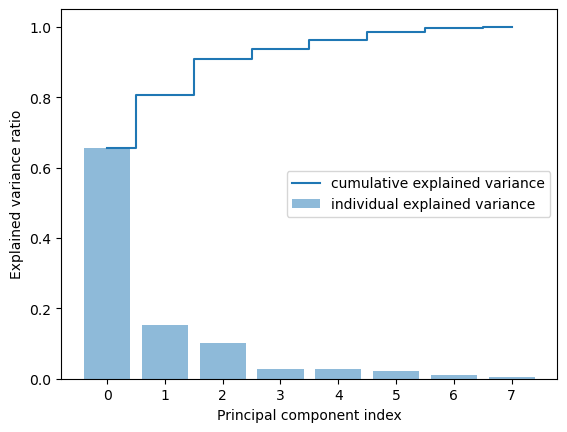

In [26]:
# PCA pertama, untuk data akademik saat belajar
pca = PCA(n_components = len(pca_columns_1), random_state=123)
pca.fit(train_pca_df[pca_columns_1])
princ_comp = pca.transform(train_pca_df[pca_columns_1])
 
var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)
 
plt.bar(range(len(pca_columns_1)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_columns_1)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='center right')
plt.show()

In [27]:
pca_1 = PCA(n_components=4, random_state=42)
pca_1.fit(train_pca_df[pca_columns_1])

joblib.dump(pca_1, "model/pca_1.joblib".format(1))
princ_comp_1 = pca_1.transform(train_pca_df[pca_columns_1])

train_pca_df[["pc1_1", "pc1_2", "pc1_3", "pc1_4"]] = pd.DataFrame(princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3", "pc1_4"])
train_pca_df.drop(columns=pca_columns_1, axis=1, inplace=True)
train_pca_df.head()

Application_mode  Course  Daytime_evening_attendance  \
0                 0       3                           0   
1                 0      16                           0   
2                16       1                           0   
3                 3       0                           0   
4                 0      15                           0   

   Previous_qualification_grade  Admission_grade  Displaced  Debtor  \
0                     -1.293080        -1.241543          0       0   
1                      1.776353         1.674757          1       0   
2                     -0.170117         0.253996          1       0   
3                      0.204204         0.050059          1       0   
4                      0.578525         0.994967          1       0   

   Tuition_fees_up_to_date  Gender  Scholarship_holder  Age_at_enrollment  \
0                        1       0                   1          -0.595627   
1                        1       0                   0          -0.727061   
2                        1       1                   0          -0.464194   
3                        1       0                   0          -0.727061   
4                        1       0                   1          -0.727061   

      pc1_1     pc1_2     pc1_3     pc1_4  
0  1.260049 -0.527463  0.431948  0.150180  
1  1.184455 -1.145680 -0.356772  0.021698  
2  1.319985  0.470145 -1.578508 -0.499019  
3  0.943656 -0.606255 -0.220827 -0.181690  
4  0.536185 -0.629658 -0.250051 -0.129738

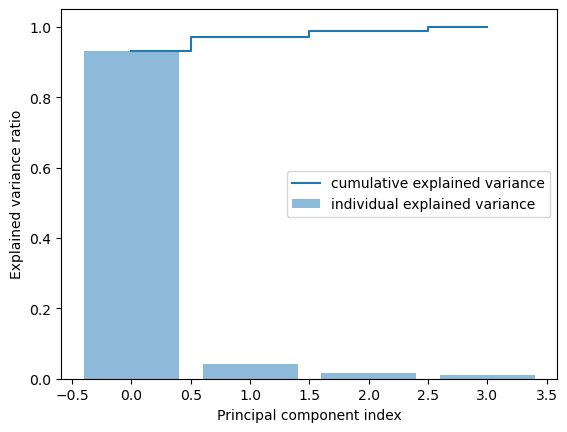

In [28]:
# PCA kedua, untuk data akademik sebelum mendaftar
pca = PCA(n_components=len(pca_columns_2), random_state=123)
pca.fit(train_pca_df[pca_columns_2])
princ_comp = pca.transform(train_pca_df[pca_columns_2])
 
var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)
 
plt.bar(range(len(pca_columns_2)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_columns_2)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [29]:
pca_2 = PCA(n_components=1, random_state=42)
pca_2.fit(train_pca_df[pca_columns_2])

joblib.dump(pca_2, "model/pca_2.joblib".format(1))
princ_comp_2 = pca_2.transform(train_pca_df[pca_columns_2])

train_pca_df[["pc2_1"]] = pd.DataFrame(princ_comp_2, columns=["pc2_1"])
train_pca_df.drop(columns=pca_columns_2, axis=1, inplace=True)
train_pca_df.head()

Course  Daytime_evening_attendance  Displaced  Debtor  \
0       3                           0          0       0   
1      16                           0          1       0   
2       1                           0          1       0   
3       0                           0          1       0   
4      15                           0          1       0   

   Tuition_fees_up_to_date  Gender  Scholarship_holder     pc1_1     pc1_2  \
0                        1       0                   1  1.260049 -0.527463   
1                        1       0                   0  1.184455 -1.145680   
2                        1       1                   0  1.319985  0.470145   
3                        1       0                   0  0.943656 -0.606255   
4                        1       0                   1  0.536185 -0.629658   

      pc1_3     pc1_4      pc2_1  
0  0.431948  0.150180  -5.464564  
1 -0.356772  0.021698  -5.447895  
2 -1.578508 -0.499019  10.481819  
3 -0.220827 -0.181690  -2.479795  
4 -0.250051 -0.129738  -5.455200

In [30]:
test_princ_comp_1 = pca_1.transform(test_pca_df[pca_columns_1])
test_pca_df[["pc1_1", "pc1_2", "pc1_3", "pc1_4"]] = pd.DataFrame(test_princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3", "pc1_4"])
test_pca_df.drop(columns=pca_columns_1, axis=1, inplace=True)
 
test_princ_comp_1 = pca_2.transform(test_pca_df[pca_columns_2])
test_pca_df[["pc2_1"]] = pd.DataFrame(test_princ_comp_1, columns=["pc2_1"])
test_pca_df.drop(columns=pca_columns_2, axis=1, inplace=True)
test_pca_df.head()

Course  Daytime_evening_attendance  Displaced  Debtor  \
0       6                           0          1       0   
1      13                           0          0       0   
2       3                           0          0       1   
3       0                           0          1       0   
4      11                           0          1       0   

   Tuition_fees_up_to_date  Gender  Scholarship_holder     pc1_1     pc1_2  \
0                        1       0                   1 -1.218584  1.735209   
1                        1       0                   0  0.513278 -0.499600   
2                        1       0                   1  1.082829 -0.722930   
3                        1       1                   0  0.648905 -0.840558   
4                        1       0                   0 -1.282274  3.577613   

      pc1_3     pc1_4     pc2_1  
0 -1.167634 -2.074545  8.611460  
1  0.018717 -0.137607 -2.484974  
2  0.885082 -0.021389 -2.479641  
3 -0.030581  0.185516 -2.475453  
4 -1.137972 -0.614206  8.569187

In [31]:
test_pca_df.columns

Index(['Course', 'Daytime_evening_attendance', 'Displaced', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'pc1_1',
       'pc1_2', 'pc1_3', 'pc1_4', 'pc2_1'],
      dtype='object')

## 4. Modeling
Proses klasifikasi multivariat ini akan membandingkan beberapa model:
1. **Naïve Bayes**, sebuah algoritma probabilitas distribusi. Variasi yang digunakan adalah *Gaussian Naive Bayes*.
2. **K-Nearest Neighbors**, sebuah algoritma yang membandingkan jarak antar titik, disebut sebagai lazy learner.
3. **Random Forest**, sebuah algoritma bagging, atau *bootstrap aggregating* yang menggunakna berbagai *decision tree* dalam sekali prediksi.
4. **Gradient Boosting**, sebuah algoritma yang menggunakan proses *boosting*, yakni membuat sebuah model yang lebih kuat melalui model sebelumnya yang lebih lemah.

### Gaussian Naïve Bayes

In [32]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, cv=10, n_jobs=-1)
nbModel_grid.fit(train_pca_df, new_y_train)


print("Best Accuracy: ",nbModel_grid.best_score_)
print("Best Params: \n", nbModel_grid.best_params_)

Best Accuracy:  0.6806165489870323
Best Params: 
 {'var_smoothing': 0.001873817422860383}


In [33]:
gnb = GaussianNB(var_smoothing = 0.001873817422860383)
gnb.fit(train_pca_df, new_y_train)

GaussianNB(var_smoothing=0.001873817422860383)

### K-Nearest Neighbor

In [34]:
KNN = KNeighborsClassifier( metric = 'minkowski' )

# GridSearch
Grid = {'n_neighbors' : [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 24, 25, 27],
        'p' : [1,2]}
KNN_CV = GridSearchCV(estimator = KNN, param_grid = Grid, cv=10, n_jobs = -1)

KNN_CV.fit(train_pca_df, new_y_train)

print("Best Accuracy: ",KNN_CV.best_score_)
print("Best Params: \n", KNN_CV.best_params_)

Best Accuracy:  0.7910346578060825
Best Params: 
 {'n_neighbors': 3, 'p': 2}


In [35]:
knn = KNeighborsClassifier(metric = 'minkowski', n_neighbors = 3, p = 2)
knn.fit(train_pca_df, new_y_train)

KNeighborsClassifier(n_neighbors=3)

### Random Forest

In [36]:

rf = RandomForestClassifier(random_state = 42)
 
Grid = { 'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [6, 7, 8],
    'criterion' :['gini', 'entropy']
}
 
CV_rf = GridSearchCV(estimator = rf, param_grid = Grid, cv = 10, n_jobs = -1)
CV_rf.fit(train_pca_df, new_y_train)

print("Best Accuracy: ",CV_rf.best_score_)
print("Best Params: \n", CV_rf.best_params_)

Best Accuracy:  0.7830753611149569
Best Params: 
 {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500}


In [37]:
rf = RandomForestClassifier(random_state = 42, criterion = 'entropy', max_depth = 8, max_features = 'sqrt', n_estimators = 500) 
rf.fit(train_pca_df, new_y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=42)

### Gradient Boosting

In [38]:
gb = GradientBoostingClassifier(random_state = 42)
 
Grid = {
    'max_depth': [5, 8],
    'n_estimators': [200, 300],
    'learning_rate': [0.01, 0.1],
    'max_features': ['sqrt', 'log2']
}
 
CV_gb = GridSearchCV(estimator=gb, param_grid=Grid, cv=5, n_jobs=-1)
CV_gb.fit(train_pca_df, new_y_train)
print("Best Accuracy: ",CV_gb.best_score_)
print("Best Params: \n", CV_gb.best_params_)

Best Accuracy:  0.8951895373012544
Best Params: 
 {'learning_rate': 0.1, 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}


In [39]:
gb = GradientBoostingClassifier(random_state = 42, learning_rate = 0.1, max_depth = 8, max_features = 'sqrt', n_estimators = 200)
gb.fit(train_pca_df, new_y_train)

GradientBoostingClassifier(max_depth=8, max_features='sqrt', n_estimators=200,
                           random_state=42)

## 5. Evaluasi

Evaluasi akan menggunakan **2 pendekatan**:
1. **Pendekatan kompleksitas komputasi**. Wall time akan digunakan untuk mengevaluasi kebutuhan *resource* model untuk melakukan prediksi. Wall time akan berguna karena dapat mensimulasikan proses pengambilan berbagai instruksi dari storage dan pemrosesan pada memori untuk melakukan sebuah prediksi.
2. **Pendekatan kemampuan prediksi**. F1-Score akan digunakan untuk mengevaluasi model. F1-Score akan dilihat pada setiap kelas prediksi (enrolled, graduate, dropout) melalui confusion matrix.
   F1-Score sendiri merupakan *rata-rata* dari metrik *precision* dan *recall*
$$F_1 = 2 \cdot \frac{ \text{Precision} \cdot \text{Recall} }{ \text{Precision} + \text{Recall} } $$
<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/1200px-Precisionrecall.svg.png'>


### K-NN

In [40]:
%%time
y_pred_knn = knn.predict(test_pca_df)

CPU times: user 22 ms, sys: 2.85 ms, total: 24.8 ms
Wall time: 41.7 ms


              precision    recall  f1-score   support

           0       0.72      0.59      0.65       316
           1       0.30      0.40      0.34       151
           2       0.78      0.79      0.79       418

    accuracy                           0.65       885
   macro avg       0.60      0.59      0.59       885
weighted avg       0.67      0.65      0.66       885



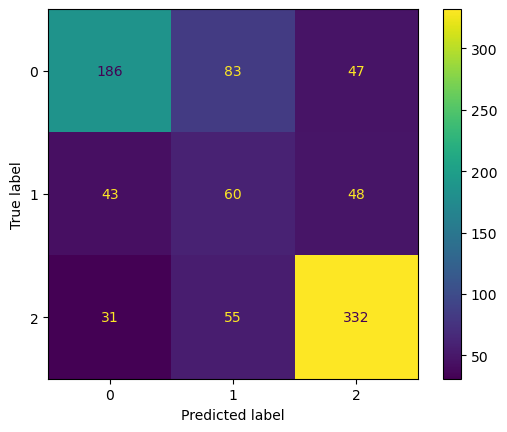

In [41]:
print(classification_report(y_pred = y_pred_knn, y_true = new_y_test))
ConfusionMatrixDisplay.from_predictions(y_pred = y_pred_knn, y_true = new_y_test)
plt.show()

### GNB

In [42]:
%%time
y_pred_nb = gnb.predict(test_pca_df)

CPU times: user 1.06 ms, sys: 202 µs, total: 1.26 ms
Wall time: 1.21 ms


              precision    recall  f1-score   support

           0       0.72      0.59      0.65       316
           1       0.30      0.40      0.34       151
           2       0.78      0.79      0.79       418

    accuracy                           0.65       885
   macro avg       0.60      0.59      0.59       885
weighted avg       0.67      0.65      0.66       885



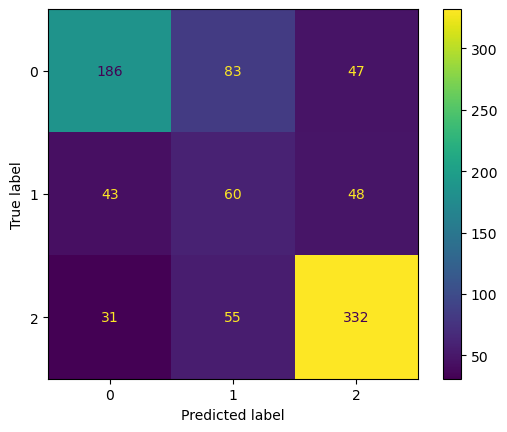

In [43]:
print(classification_report(y_pred = y_pred_knn, y_true = new_y_test))
ConfusionMatrixDisplay.from_predictions(y_pred = y_pred_knn, y_true = new_y_test)
plt.show()

### RF

In [44]:
%%time
y_pred_rf = rf.predict(test_pca_df)

CPU times: user 135 ms, sys: 8.85 ms, total: 144 ms
Wall time: 57.8 ms


              precision    recall  f1-score   support

           0       0.84      0.66      0.74       316
           1       0.42      0.49      0.45       151
           2       0.78      0.86      0.82       418

    accuracy                           0.73       885
   macro avg       0.68      0.67      0.67       885
weighted avg       0.74      0.73      0.73       885



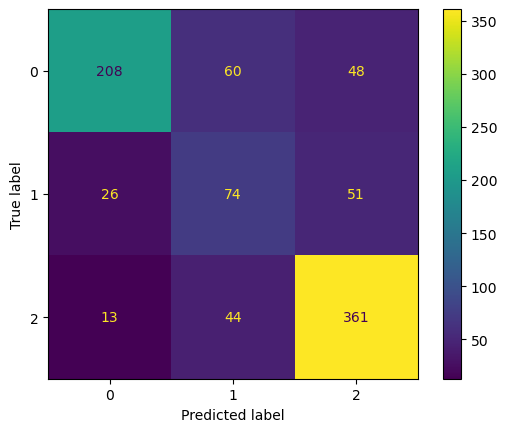

In [45]:
print(classification_report(y_pred = y_pred_rf, y_true = new_y_test))
ConfusionMatrixDisplay.from_predictions(y_pred = y_pred_rf, y_true = new_y_test)
plt.show()

### GB

In [46]:
%%time
y_pred_gb = gb.predict(test_pca_df)

CPU times: user 81 ms, sys: 7.04 ms, total: 88.1 ms
Wall time: 33.9 ms


              precision    recall  f1-score   support

           0       0.82      0.70      0.76       316
           1       0.46      0.36      0.40       151
           2       0.77      0.92      0.84       418

    accuracy                           0.75       885
   macro avg       0.68      0.66      0.67       885
weighted avg       0.74      0.75      0.74       885



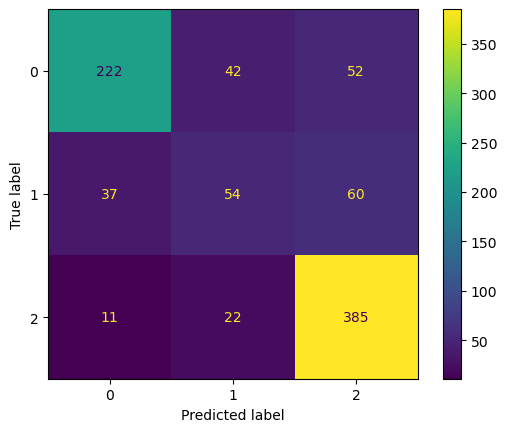

In [47]:
print(classification_report(y_pred = y_pred_gb, y_true = new_y_test))
ConfusionMatrixDisplay.from_predictions(y_pred = y_pred_gb, y_true = new_y_test)
plt.show()

Melalui hasil evaluasi ada beberapa poin yang dapat diambil:
1. Hasil prediksi Gradient Boosting memiliki nilai evaluasi F1 yang paling baik, hanya saja memiliki kelemahan pada proses prediksi kelas enrolled dan paling baik saat memprediksi kelas graduate
2. Naive Bayes memiliki kompleksitas yang sangat rendah, akan tetapi dalam trade-off performa dan kompleksitas Gradient Boosting dapat dikatakan sebagai model terbaik.

Maka dari itu, model yang akan digunakan dalam *deployment* adalah model ***Gradient Boosting***

In [48]:
joblib.dump(gb, "model/gb_model.joblib")

['model/gb_model.joblib']

## 6. Conclusions

1. Demografis. Para pelajar yang mendaftar pada umur yang lebih tua cenderung memiliki berbagai tanggungan, maka mereka akan mengambil kelas malam. Beban pelajaran dan pekerjaan yang mungkin mereka miliki menghambat proses pembelajaran mereka. Hal ini ditambah dengan program studi yang mereka ambil kemungkinan merupakan program yang mereka jadikan formalitas dalam memiliki gelar, sehingga kurang .
2. Finansial. Para pelajar yang memiliki hutang, tidak tepat waktu membayar biaya pendidikan, dan tidak memiliki beasiswa akan lebih mungkin dropout. Hal ini dapat menjadi perhatian Jaya Jaya Institut untuk membantu para pelajar yang memiliki kesultan dalam sisi finansial, sehingga pelajar dapat fokus terhadap pendidikan.
3. Akademik. Dikarenakan beberapa faktor yang disebutkan sebelumnya, dukungan dalam sisi akademik sangat diperlukan. Hal ini karena hasil pendidikan selama 2 semester menunjukkan bahwa pelajar yang *dropout* memiliki nilai yang lebih rendah dibandingkan mereka yang *graduate*. Sehingga, dukungan akademik menjadi penting dalam meningkatkan keseluruhan kualitas pendidikan Jaya Jaya Institut

## 7. Rekomendasi Action Items
- Memberikan bantuan konseling pada pelajar. Hal ini mengingat bahwa para pelajar yang memiliki umur lebih tua memiliki tanggung jawab yang lebih banyak dibandingkan para pelajar yang muda. Hal ini menjadikan para pelajar yang lebih tua butuh untuk diberi dukungan melalui konseling akademik yang dapat mendorong mereka untuk menyelesaikan pembelajaran mereka pada Jaya Jaya Institut
- Membuka lebih banyak kesempatan beasiswa. Melalui ketersediaan berbagai sarana untuk memenuhi kebutuhan finansial, para pelajar akan menjadi lebih termotivasi dan lebih fokus dalam menjalankan pendidikan mereka. Hal ini dapat berguna pula dengan memberikan kepada pelajar yang menerima beasiswa sebuah *sense of responsibility* ketika sudah diberikan bantuan finansial
- Menghadirkan sistem *learning buddy*. Sebuah sistem dimana para pelajar dapat memiliki *sense of belonging* dengan memiliki teman belajar dapat memotivasi mereka untuk menyelesaikan pendidikan. Hal ini dapat dilakukan Jaya Jaya Institut dengan memasangkan pelajar dengan kebutuhan lebih pada sisi akademik dengan mereka yang lebih memiliki kapabilitas. 

© 2024 - Louis Widi Anandaputra